<a href="https://colab.research.google.com/github/dpnolan/taba/blob/main/TABA_Bank_data_logic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part B
# Bank telesales data analysis using Logisitic Regression

In [4]:
# Start a new R notebook in Jupyter using URL https://colab.research.google.com/notebook#create=true&language=r 

# Install R and libraries 

The input file gets deleted whenever a runtime ends, so upload the file __Bank.csv__ through the upload icon (page plus up arrow) on the left hand column into the __sample_data__ directory

In [100]:
library(ggplot2) 
library(scales)

In [101]:
install.packages('moments')
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [103]:
library(repr)
options(repr.plot.width=15, repr.plot.height=12)

# Upload and import bank data

In [41]:
getwd()

[1] "/content"

In [42]:
setwd("/content/sample_data")

In [45]:
list.files()


[1] "anscombe.json"                "Bank.csv"                    
[3] "california_housing_test.csv"  "california_housing_train.csv"
[5] "mnist_test.csv"               "mnist_train_small.csv"       
[7] "README.md"

In [46]:
rm(bank)

In [71]:
bank=read.csv('Bank.csv',header=TRUE, sep=",", row.names=NULL)
bank=data.frame(bank)

In [72]:
head(bank)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [73]:
summary(bank)

      age            job              marital           education        
 Min.   :18.00   Length:45211       Length:45211       Length:45211      
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.94                                                           
 3rd Qu.:48.00                                                           
 Max.   :95.00                                                           
   default             balance         housing              loan          
 Length:45211       Min.   : -8019   Length:45211       Length:45211      
 Class :character   1st Qu.:    72   Class :character   Class :character  
 Mode  :character   Median :   448   Mode  :character   Mode  :character  
                    Mean   :  1362                                        
                    3rd Qu.:  1428                                        
                    Max.   :1021

In [74]:
bank_clean<-bank

# Pre-processing

Note that balance is in the dataset but not in the document   
I include it in the analysis here


In [51]:
# Convert the categorical variables to factors in R
job_factor<-factor(bank$job)

In [75]:
summary(job_factor)

admin.   blue-collar  entrepreneur     housemaid    management 
         5171          9732          1487          1240          9458 
      retired self-employed      services       student    technician 
         2264          1579          4154           938          7597 
   unemployed       unknown 
         1303           288

In [76]:
dim(job_factor)

NULL

In [77]:
bank_clean<-cbind(bank_clean,job_factor)

In [78]:
marital_factor<-factor(bank$marital)
summary(marital_factor)
bank_clean<-cbind(bank_clean,marital_factor)


divorced  married   single 
    5207    27214    12790

In [79]:
education_factor<-factor(bank$education)
summary(education_factor)
bank_clean<-cbind(bank_clean,education_factor)

primary secondary  tertiary   unknown 
     6851     23202     13301      1857

In [80]:
default_factor<-factor(bank$default)
summary(default_factor)
bank_clean<-cbind(bank_clean,default_factor)

no   yes 
44396   815

In [81]:
housing_factor<-factor(bank$housing)
summary(housing_factor)
bank_clean<-cbind(bank_clean,housing_factor)

no   yes 
20081 25130

In [82]:
loan_factor<-factor(bank$loan)
summary(loan_factor)
bank_clean<-cbind(bank_clean,loan_factor)

no   yes 
37967  7244

In [83]:
# month is converted to factor but preserving the defined calendar order
month_factor<-factor(bank$month,levels=c('jan','feb','mar','apr','may',
                                         'jun','jul','aug','sep','oct','nov','dec'))

In [84]:
summary(month_factor)
bank_clean<-cbind(bank_clean,month_factor)

jan   feb   mar   apr   may   jun   jul   aug   sep   oct   nov   dec 
 1403  2649   477  2932 13766  5341  6895  6247   579   738  3970   214

In [85]:
contact_factor<-factor(bank$contact)
summary(contact_factor)
bank_clean<-cbind(bank_clean,contact_factor)

cellular telephone   unknown 
    29285      2906     13020

In [86]:
poutcome_factor<-factor(bank$poutcome)
summary(poutcome_factor)
bank_clean<-cbind(bank_clean,poutcome_factor)

failure   other success unknown 
   4901    1840    1511   36959

In [87]:
#y is the binary outcome variable
y_factor<-factor(bank$y)
summary(y_factor)
bank_clean<-cbind(bank_clean,y_factor)

no   yes 
39922  5289

 Counts
 no = 39,922  
 yes = 5,289    
 5289/(39922+5289)=  0.1169848 approx = 11.7%,    
 Similar to the original study by Moro et al. 2014   
 The classes are significantly imbalanced,    
 so simply constantly predicting y='no' will be correct about 88.3% of the time   



In [88]:
# pdays - values for -1, we assume are NA, no recorded value
bank_clean['pdays'][bank_clean['pdays'] == -1]<-NA
pdays<-bank_clean['pdays']
#How many NA and how many real values are there? 8,257 real, 36,954 NAs
length(bank_clean$pdays)-sum(is.na(bank_clean$pdays))
summary(bank_clean$pdays)

[1] 8257

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0   133.0   194.0   224.6   327.0   871.0   36954 

In [89]:
# Delete the now factorised variables from the working data i.e.  
library('dplyr')
bank_clean <- dplyr::select(bank_clean,-job,-marital,-education,-default,-housing,-loan,
                     -contact, -poutcome,-month,-day,-pdays,-y)

In [90]:
# bank clean contains the dependent variables plus y_factor, the binary dependent variable
independent_variables <- dplyr::select (bank_clean,-y_factor)

In [91]:
# Print the column names of our working data for visual inspection of the columns remaining
colnames(bank_clean)
colnames(independent_variables)

[1] "age"              "balance"          "duration"         "campaign"        
 [5] "previous"         "job_factor"       "marital_factor"   "education_factor"
 [9] "default_factor"   "housing_factor"   "loan_factor"      "month_factor"    
[13] "contact_factor"   "poutcome_factor"  "y_factor"

[1] "age"              "balance"          "duration"         "campaign"        
 [5] "previous"         "job_factor"       "marital_factor"   "education_factor"
 [9] "default_factor"   "housing_factor"   "loan_factor"      "month_factor"    
[13] "contact_factor"   "poutcome_factor"

In [92]:
# Get summary statistics for our working dataframe
summary(bank_clean)

      age           balance          duration         campaign     
 Min.   :18.00   Min.   : -8019   Min.   :   0.0   Min.   : 1.000  
 1st Qu.:33.00   1st Qu.:    72   1st Qu.: 103.0   1st Qu.: 1.000  
 Median :39.00   Median :   448   Median : 180.0   Median : 2.000  
 Mean   :40.94   Mean   :  1362   Mean   : 258.2   Mean   : 2.764  
 3rd Qu.:48.00   3rd Qu.:  1428   3rd Qu.: 319.0   3rd Qu.: 3.000  
 Max.   :95.00   Max.   :102127   Max.   :4918.0   Max.   :63.000  
                                                                   
    previous              job_factor    marital_factor   education_factor
 Min.   :  0.0000   blue-collar:9732   divorced: 5207   primary  : 6851  
 1st Qu.:  0.0000   management :9458   married :27214   secondary:23202  
 Median :  0.0000   technician :7597   single  :12790   tertiary :13301  
 Mean   :  0.5803   admin.     :5171                    unknown  : 1857  
 3rd Qu.:  0.0000   services   :4154                                     
 Max.   :275

# Graph and describe the data

In [98]:
dev.off() # might be needed to clear the plot buffer

null device 
          1

## Violin plots for the numerical variables
 Is the y='yes' population associated with particular common characteristics?   
 Code adapted from Chang, 2019, section 6.8 and 6.9   
 White dot shows the median   
 Black area shows a box plot with top and bottom edges at 75 and 25 percentile levels   

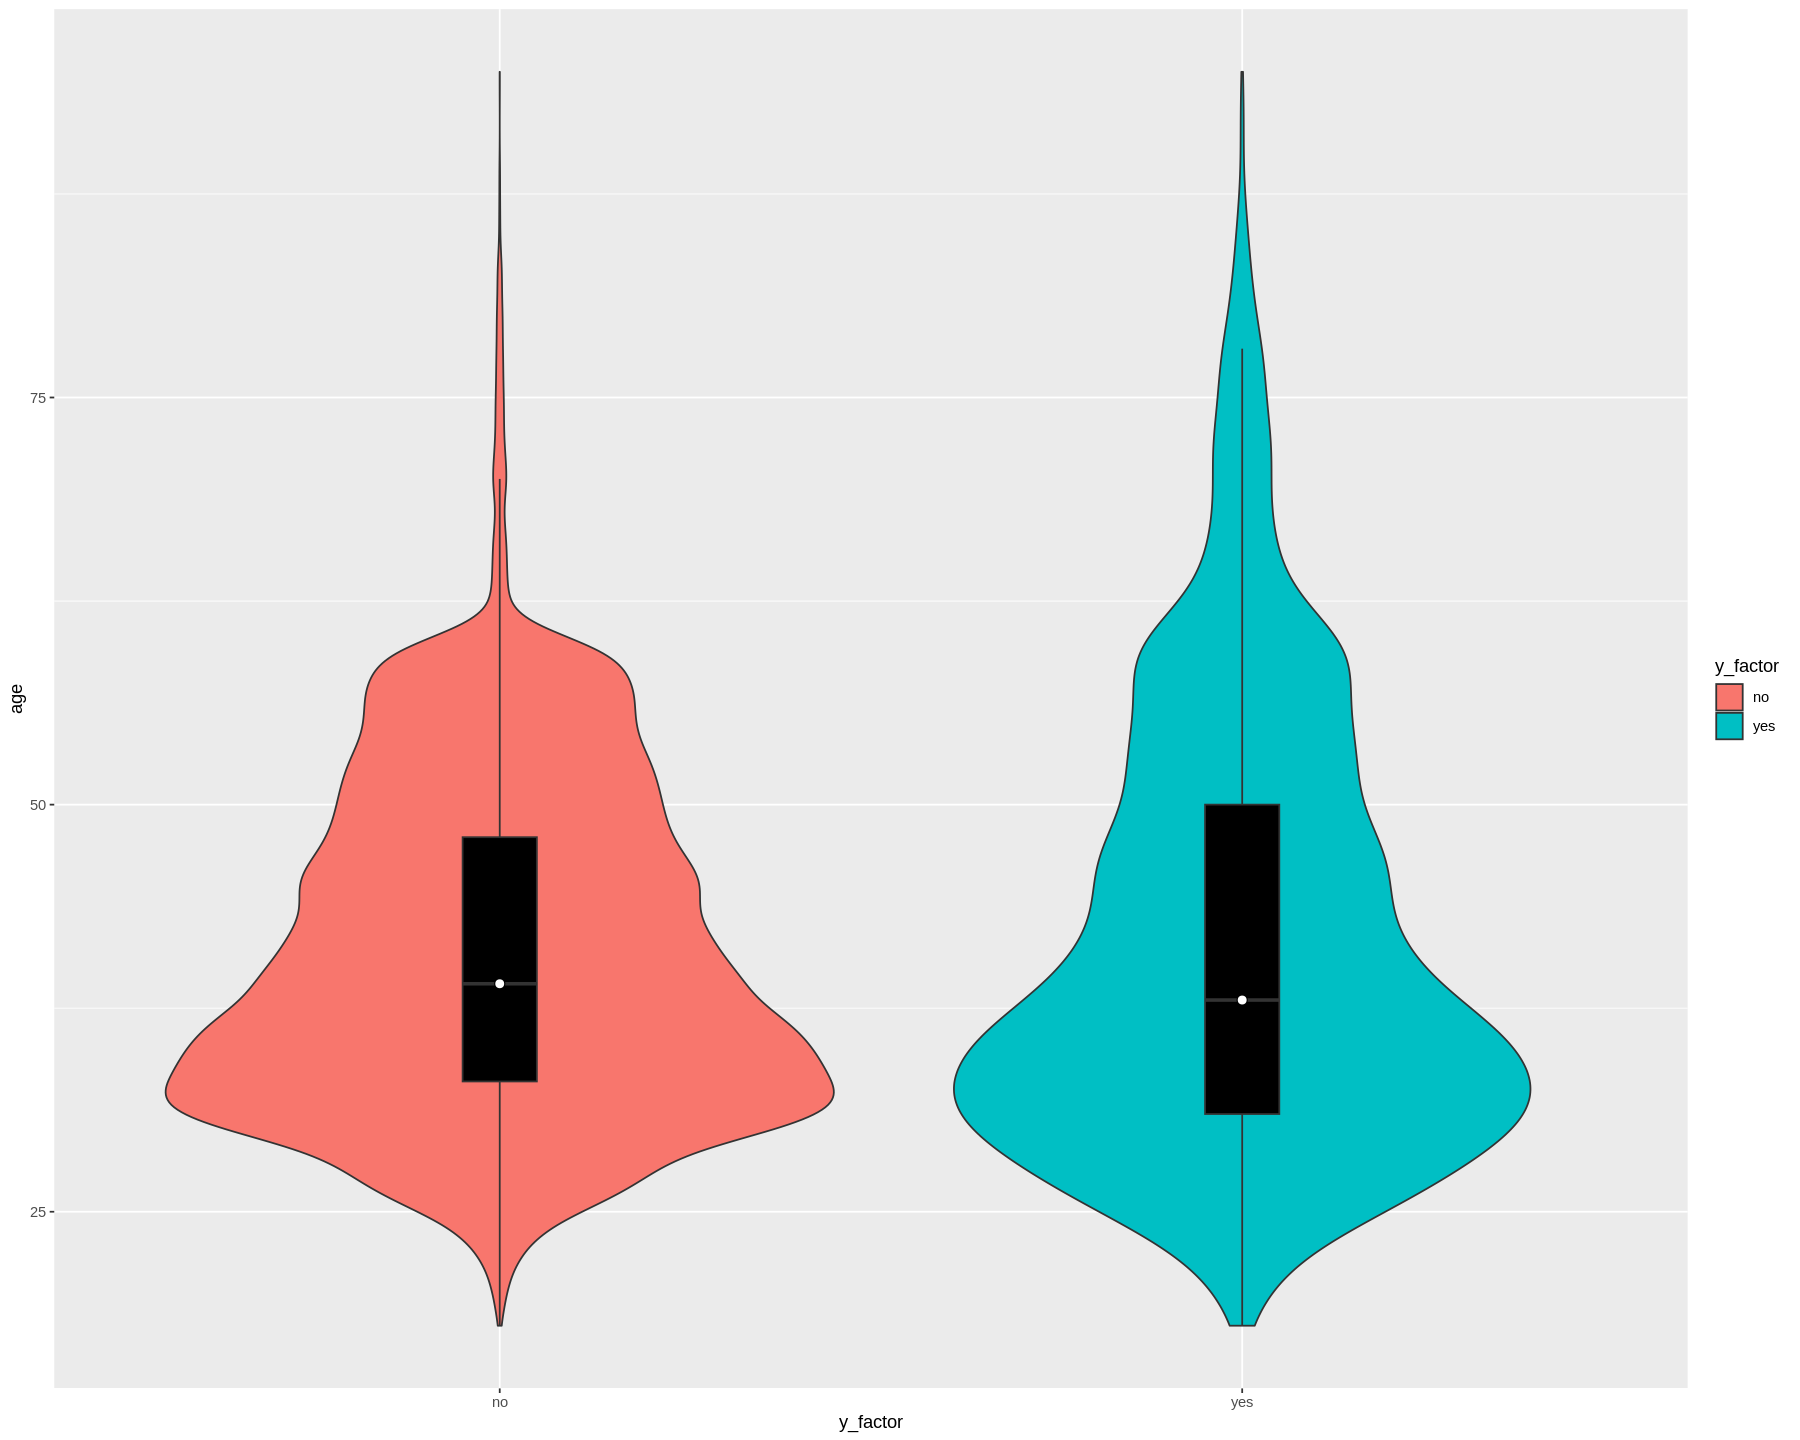

In [104]:
# Graph 1 - customer age in yes and no datasets
hw_p <- ggplot(bank_clean, aes(x = y_factor, y=age, fill=y_factor  ))
hw_p + geom_violin() +
  geom_boxplot(width = .1, 
               fill = "black", 
               outlier.colour = NA) + 
  stat_summary(fun = median, geom = "point", fill = "white", shape = 21, size = 2.5)
# 'yes' population skews more, 0.87 v 0.59, towards the older and younger extreme,
# than the 'no' population

In [102]:
mean(bank_clean['age'][bank_clean['y_factor']=='yes']) # 41.67
mean(bank_clean['age'][bank_clean['y_factor']=='no']) # 40.84
# mean age is older for 'yes'
median(bank_clean['age'][bank_clean['y_factor']=='yes']) # 38 
median(bank_clean['age'][bank_clean['y_factor']=='no']) # 39
# median age is younger for 'yes'
skewness(bank_clean['age'][bank_clean['y_factor']=='yes']) # 0.87
skewness(bank_clean['age'][bank_clean['y_factor']=='no']) # 0.59
# skew much greater for 'yes'
kurtosis(bank_clean['age'][bank_clean['y_factor']=='yes']) # 0.28
kurtosis(bank_clean['age'][bank_clean['y_factor']=='no']) # 0.052
# kurtosis much greater for 'yes'

[1] 41.67007

[1] 40.83899

[1] 38

[1] 39

[1] 0.8668487

[1] 0.5920266

[1] 3.285338

[1] 3.05197

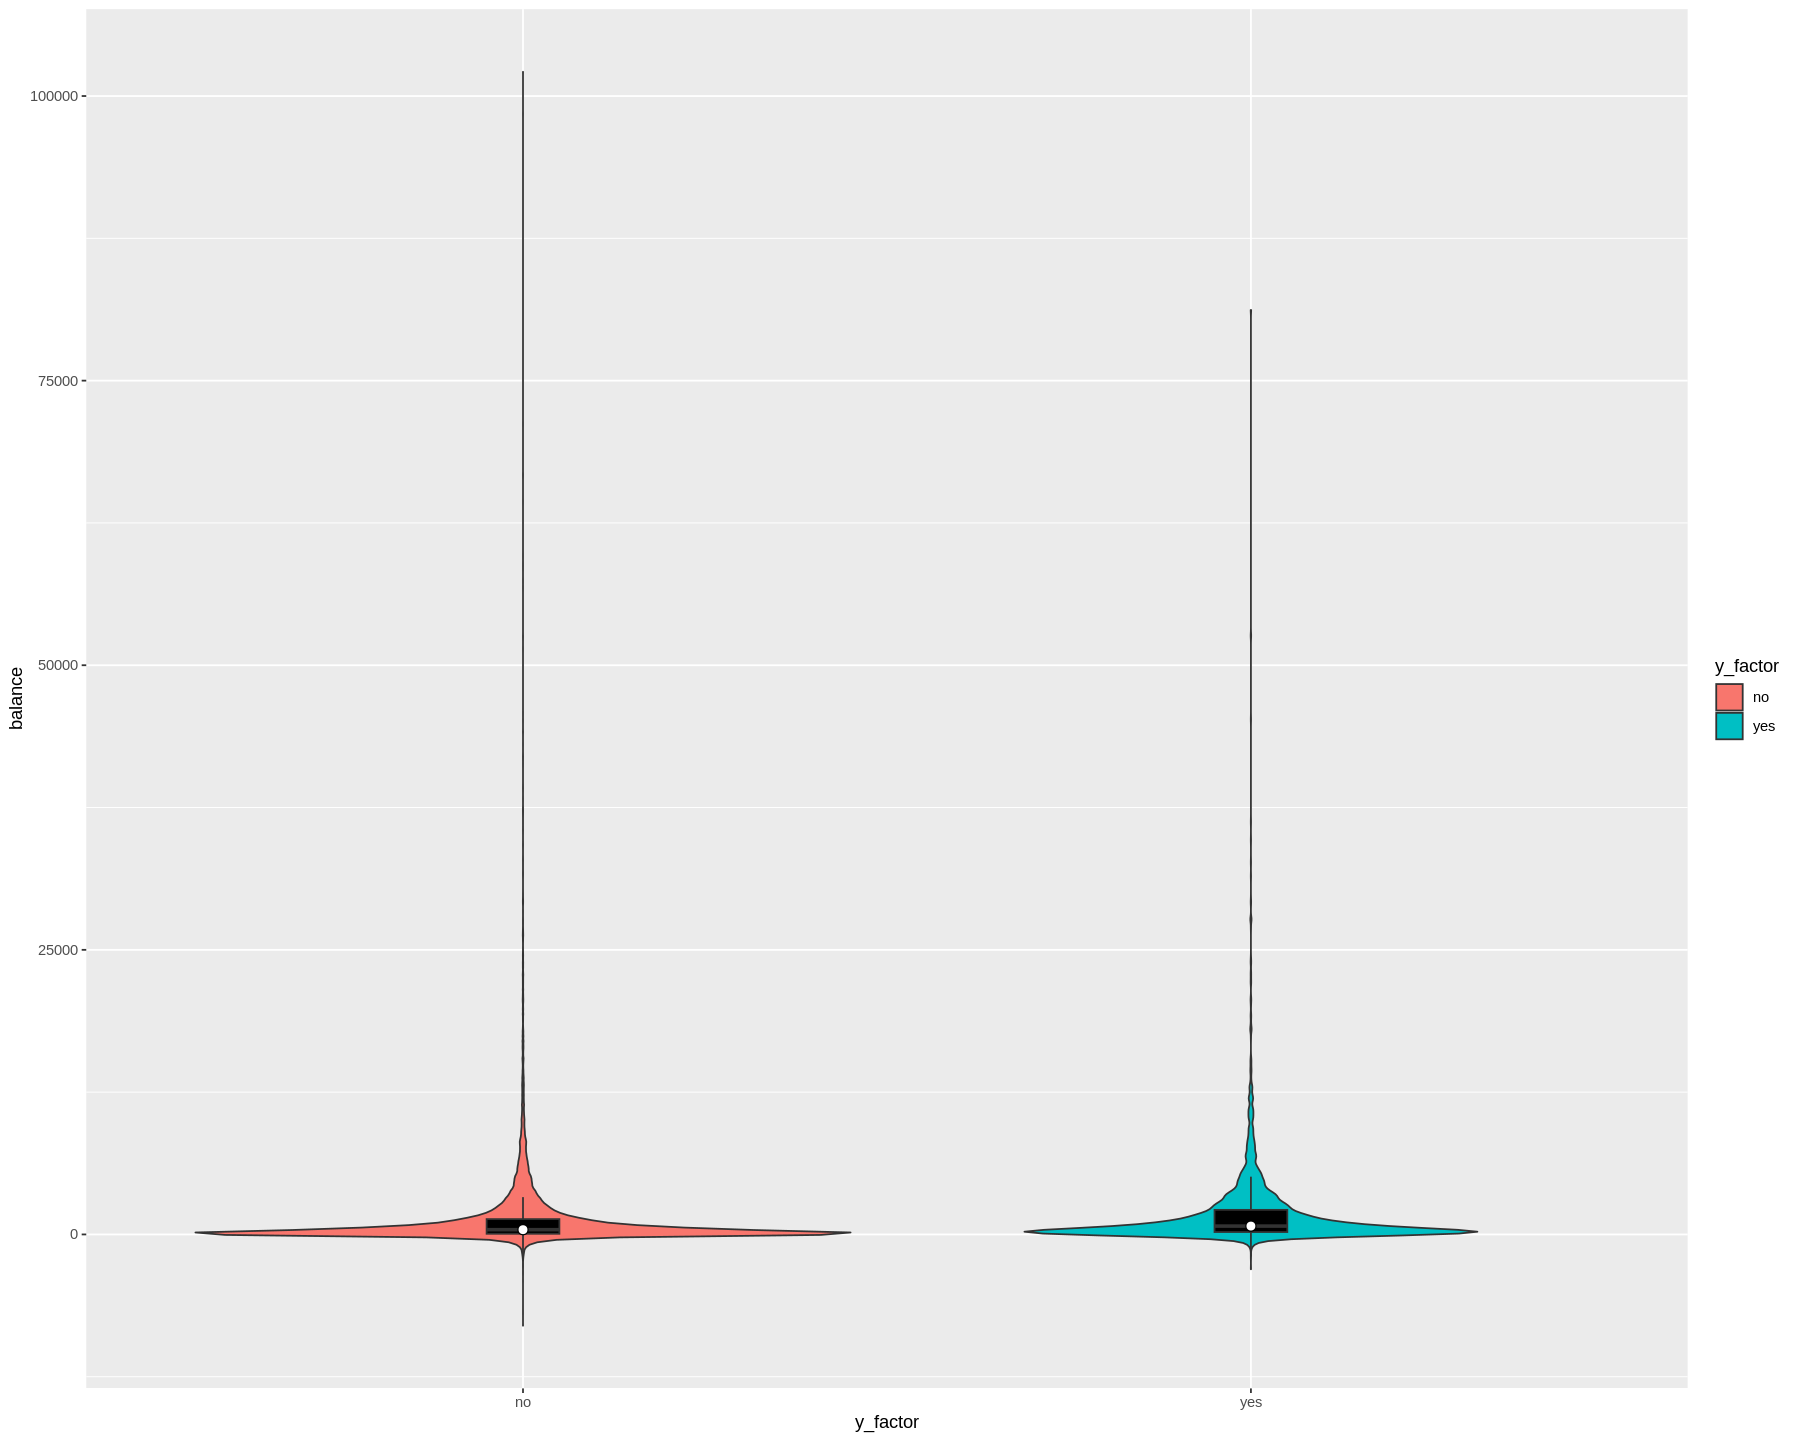

In [105]:
# Graph 2 - relationship balance in yes and no datasets
hw_p <- ggplot(bank_clean, aes(x = y_factor, y=balance, fill=y_factor  ))
hw_p + geom_violin() +
  geom_boxplot(width = .1, 
               fill = "black", 
               outlier.colour = NA) + 
  stat_summary(fun = median, geom = "point", fill = "white", shape = 21, size = 2.5)


In [106]:
# 'yes' population has bigger balance on the relationship
mean(bank_clean['balance'][bank_clean['y_factor']=='yes'])
mean(bank_clean['balance'][bank_clean['y_factor']=='no'])
# Greater mean balance, 1804 v 1304, for 'yes' 


[1] 1804.268

[1] 1303.715

Warning message:
“Removed 4288 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 4288 rows containing non-finite values (`stat_boxplot()`).”


geom_point: na.rm = FALSE
stat_summary: fun.data = NULL, fun = function (x, na.rm = FALSE, ...) 
UseMethod("median"), fun.max = NULL, fun.min = NULL, fun.args = list(), na.rm = FALSE, orientation = NA
position_identity 

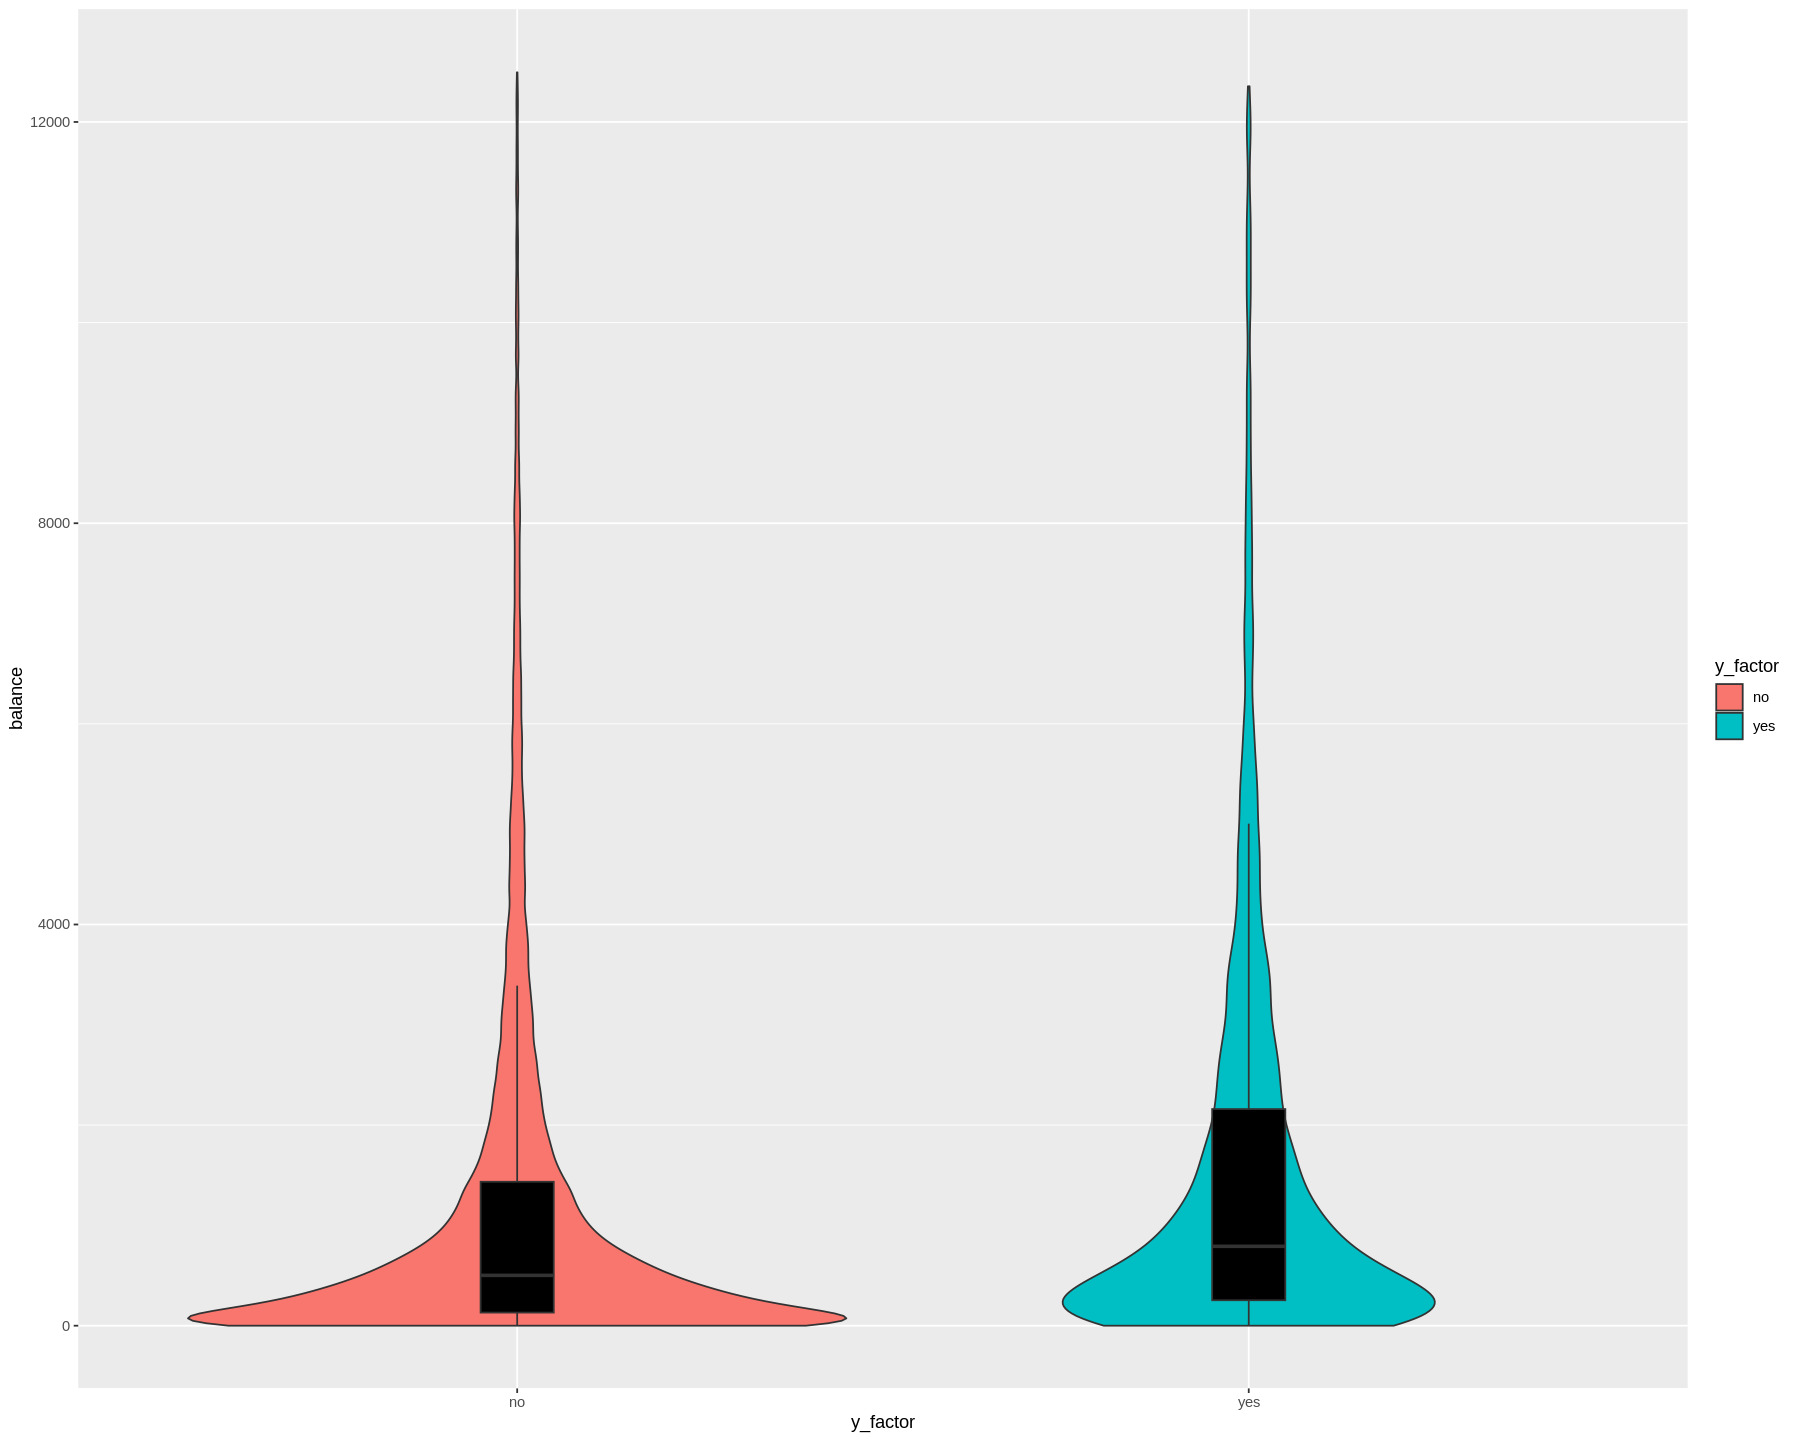

In [107]:
# Graph 3 - relationship balance in yes and no datasets with a limit on the y-axis
hw_p <- ggplot(bank_clean, aes(x = y_factor, y=balance, fill=y_factor  ))
hw_p + geom_violin() +
  geom_boxplot(width = .1, 
               fill = "black", 
               outlier.colour = NA) + ylim(0,12500)
stat_summary(fun = median, geom = "point", fill = "white", shape = 21, size = 2.5)


In [108]:
mean(bank_clean['balance'][bank_clean['y_factor']=='yes'])
mean(bank_clean['balance'][bank_clean['y_factor']=='no'])
median(bank_clean['balance'][bank_clean['y_factor']=='yes'])
median(bank_clean['balance'][bank_clean['y_factor']=='no'])
skewness(bank_clean['balance'][bank_clean['y_factor']=='yes'])
skewness(bank_clean['balance'][bank_clean['y_factor']=='no'])
kurtosis(bank_clean['balance'][bank_clean['y_factor']=='yes'])
kurtosis(bank_clean['balance'][bank_clean['y_factor']=='no'])
# 'yes' population has bigger balance on the relationship, 
# mean 1804 v 1303 EUR, median 733 v 417 EUR
# 'yes' population has far fewer zero or very low balance values than the 'no' population

[1] 1804.268

[1] 1303.715

[1] 733

[1] 417

[1] 8.444308

[1] 8.310068

[1] 136.918

[1] 143.5112

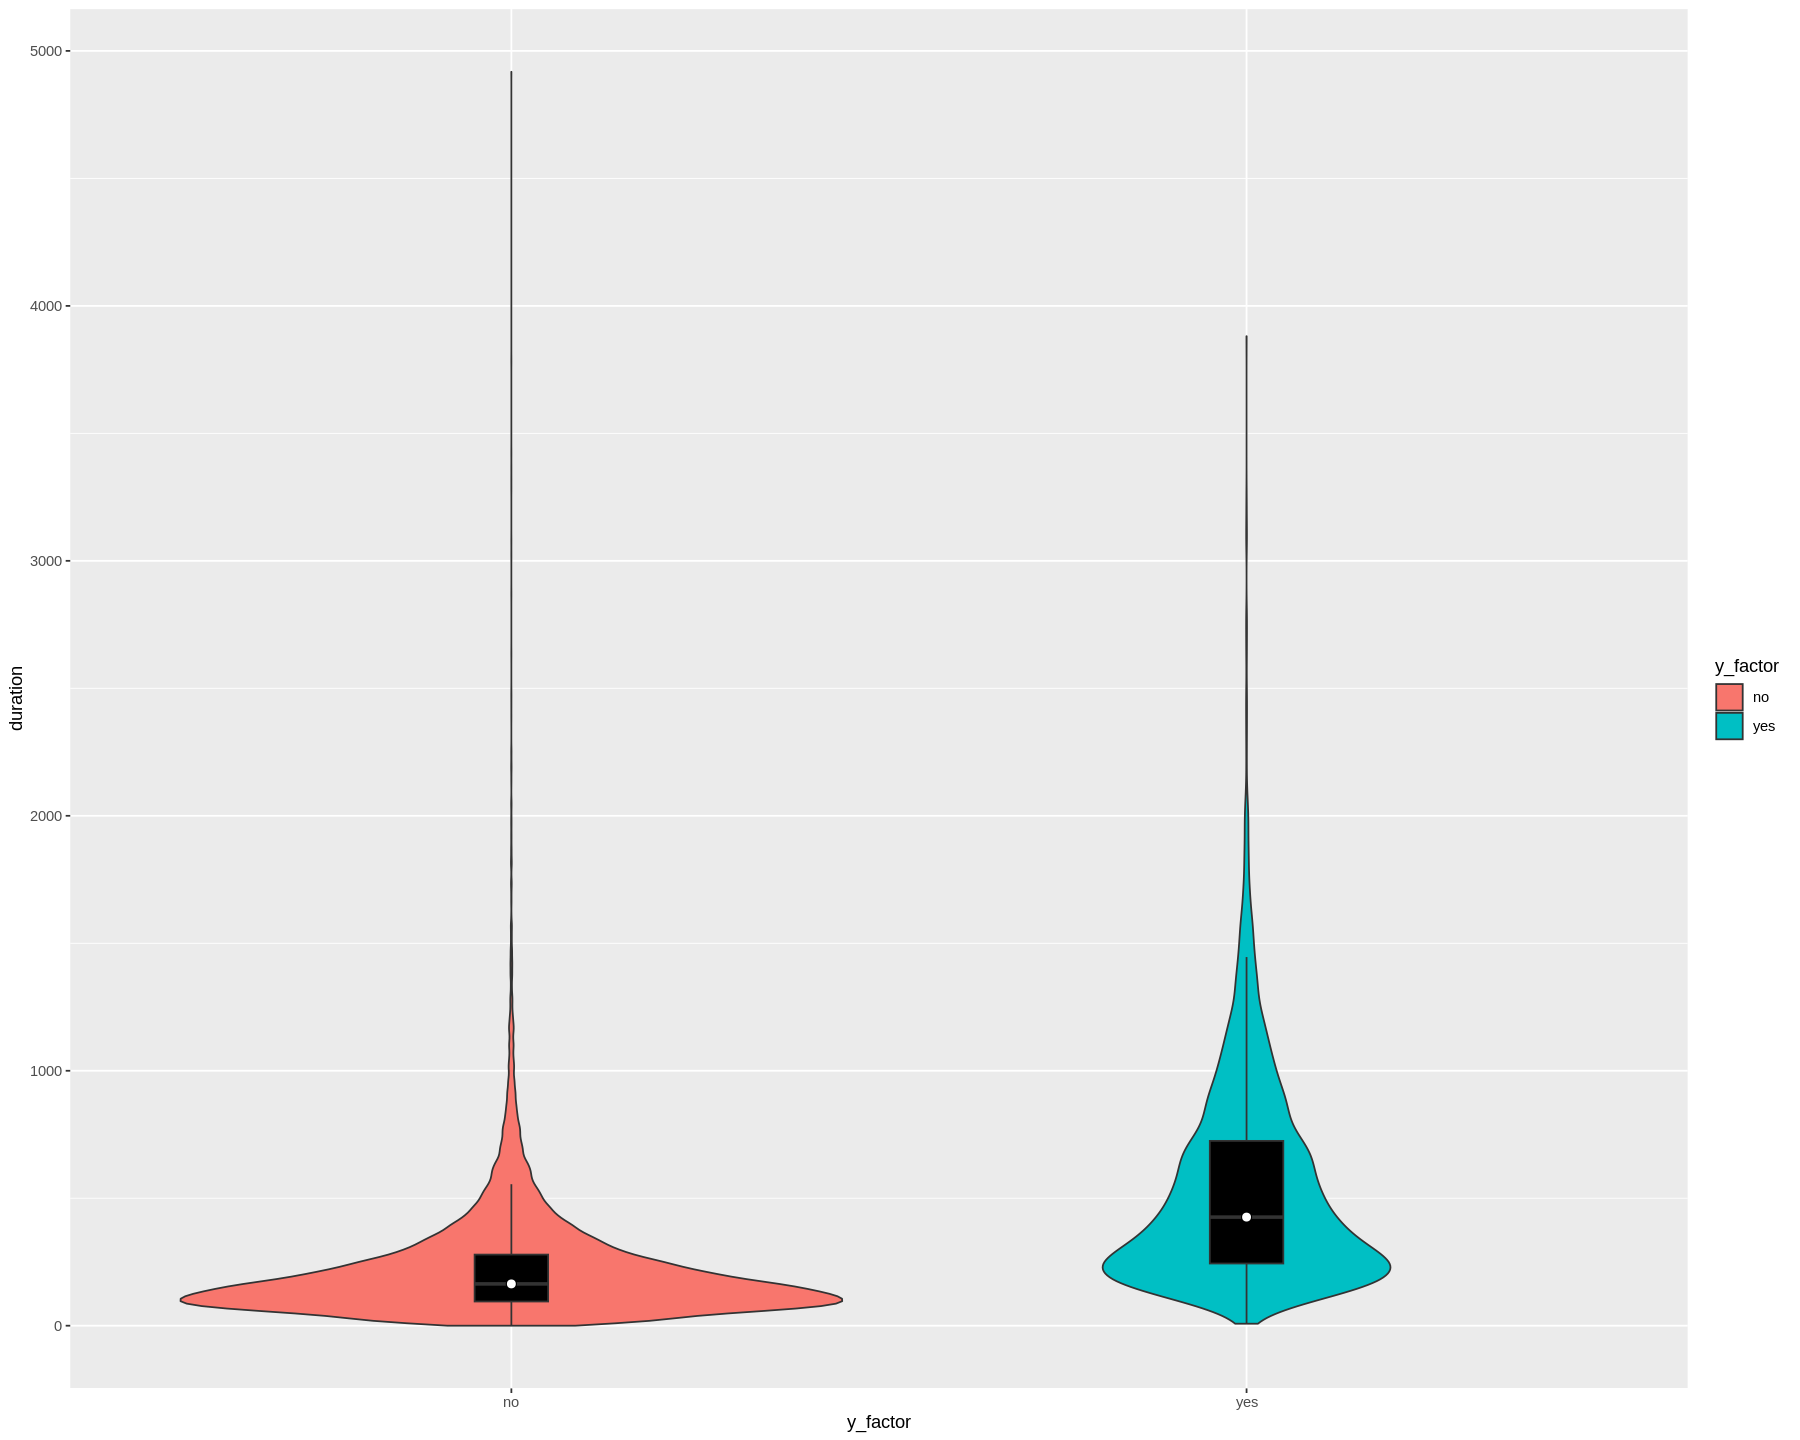

In [109]:
# Graph 4 - last contact duration, in seconds in yes and no datasets
hw_p <- ggplot(bank_clean, aes(x = y_factor, y=duration, fill=y_factor  ))
hw_p + geom_violin() +
  geom_boxplot(width = .1, 
               fill = "black", 
               outlier.colour = NA) + 
  stat_summary(fun = median, geom = "point", fill = "white", shape = 21, size = 2.5)

In [110]:
mean(bank_clean['duration'][bank_clean['y_factor']=='yes'])
mean(bank_clean['duration'][bank_clean['y_factor']=='no'])
median(bank_clean['duration'][bank_clean['y_factor']=='yes'])
median(bank_clean['duration'][bank_clean['y_factor']=='no'])
# duration, yes has fewer short conversations, 537 seconds (about 9 mins) v 221 (under 4 mins)
# median 426 v 164, 7 mins against 2.5

[1] 537.2946

[1] 221.1828

[1] 426

[1] 164

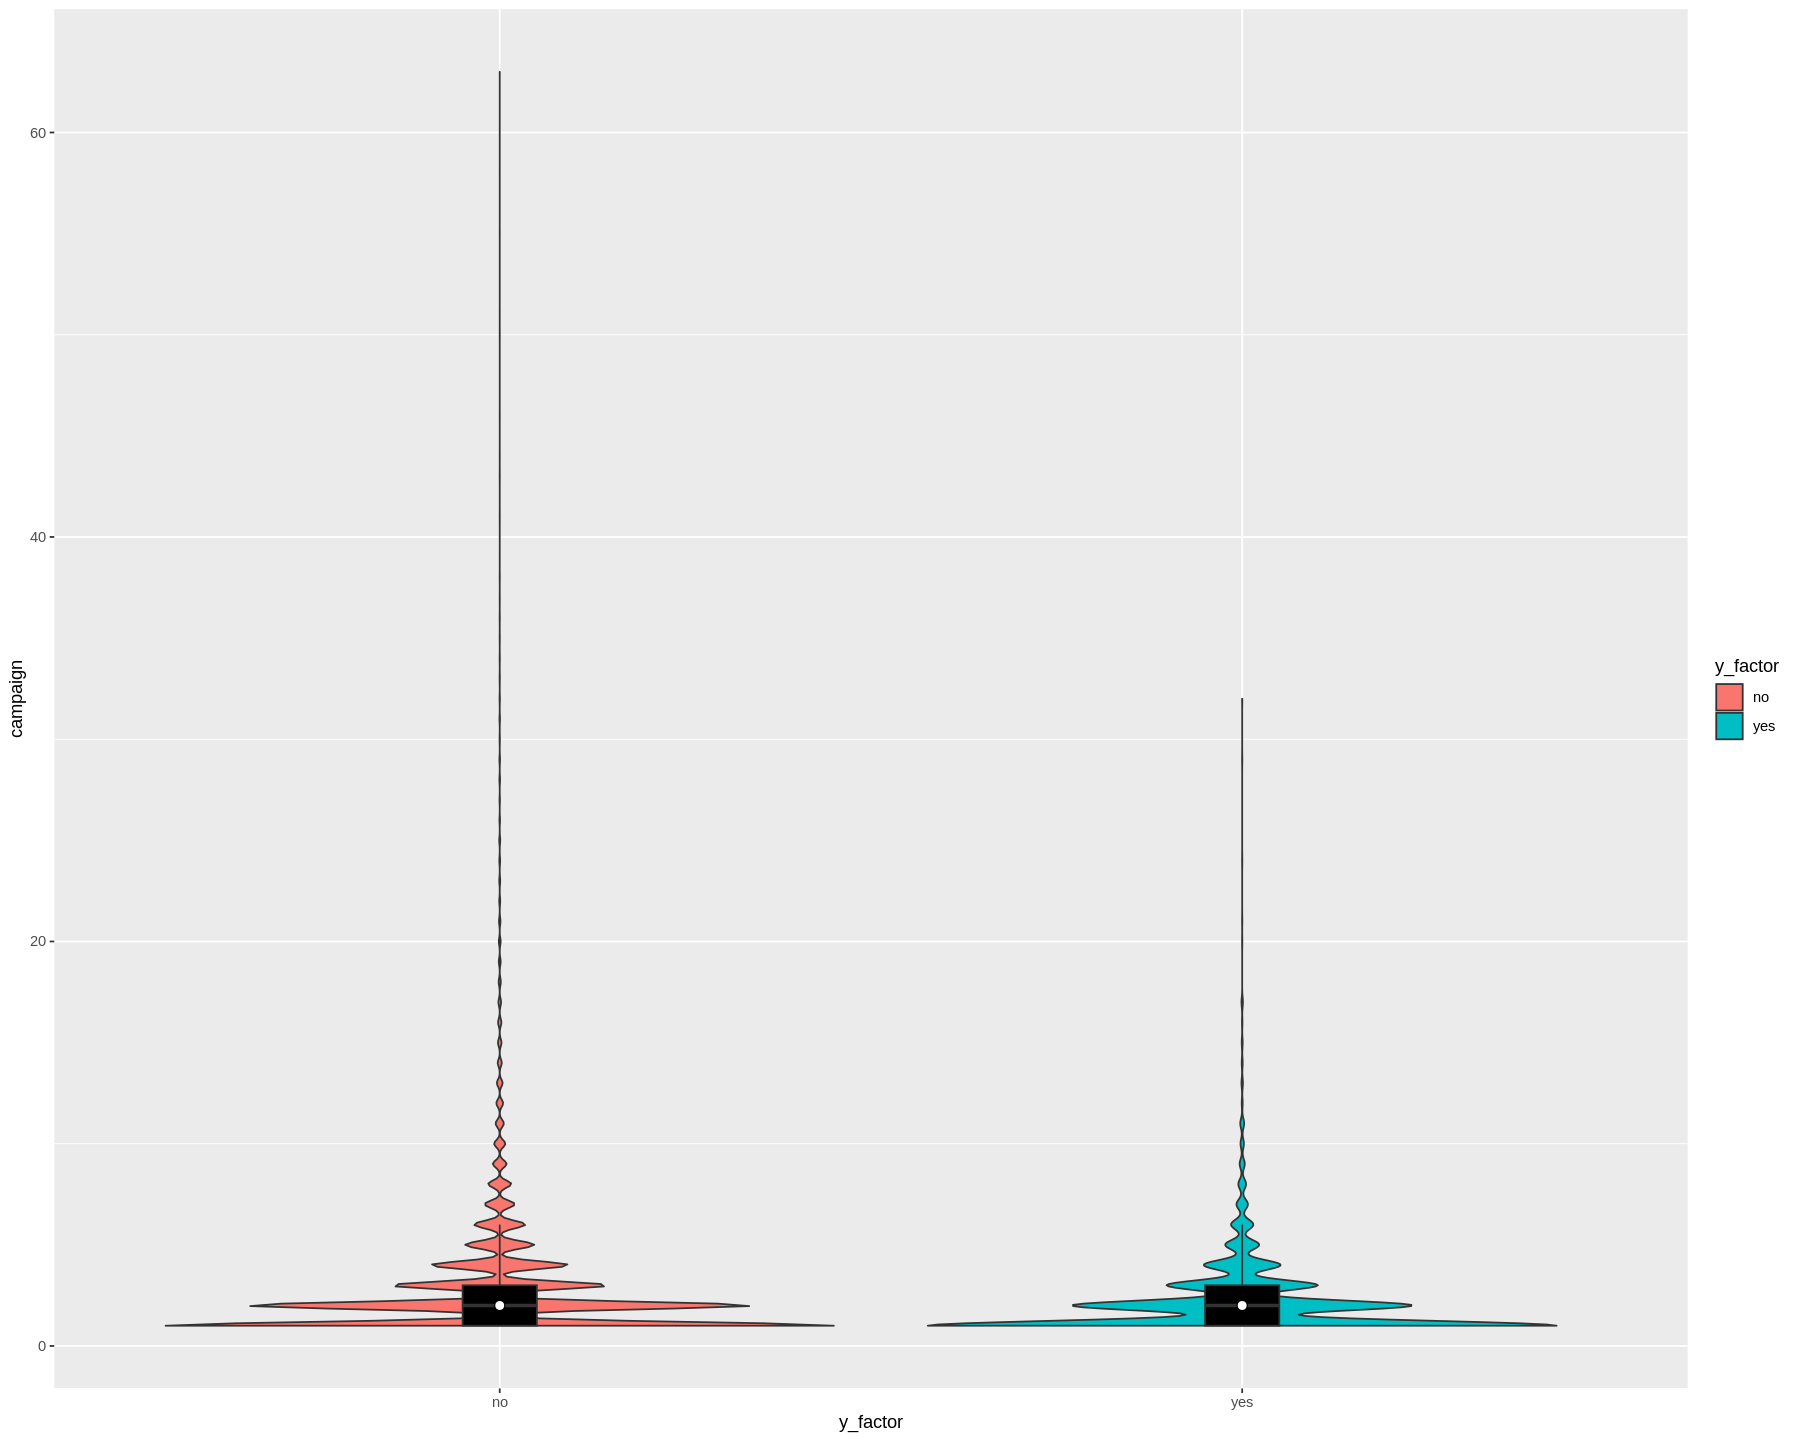

In [111]:
  # Graph 5 - number of contacts during this campaign for this client in yes and no datasets
hw_p <- ggplot(bank_clean, aes(x = y_factor, y=campaign,fill=y_factor  ))
hw_p + geom_violin() +
  geom_boxplot(width = .1, 
               fill = "black", 
               outlier.colour = NA) + 
  stat_summary(fun = median, geom = "point", fill = "white", shape = 21, size = 2.5)

In [112]:
mean(bank_clean['campaign'][bank_clean['y_factor']=='yes'])
mean(bank_clean['campaign'][bank_clean['y_factor']=='no'])
median(bank_clean['campaign'][bank_clean['y_factor']=='yes'])
median(bank_clean['campaign'][bank_clean['y_factor']=='no'])

[1] 2.141047

[1] 2.84635

[1] 2

[1] 2

Warning message:
“Removed 530 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 530 rows containing non-finite values (`stat_boxplot()`).”


geom_point: na.rm = FALSE
stat_summary: fun.data = NULL, fun = function (x, na.rm = FALSE, ...) 
UseMethod("median"), fun.max = NULL, fun.min = NULL, fun.args = list(), na.rm = FALSE, orientation = NA
position_identity 

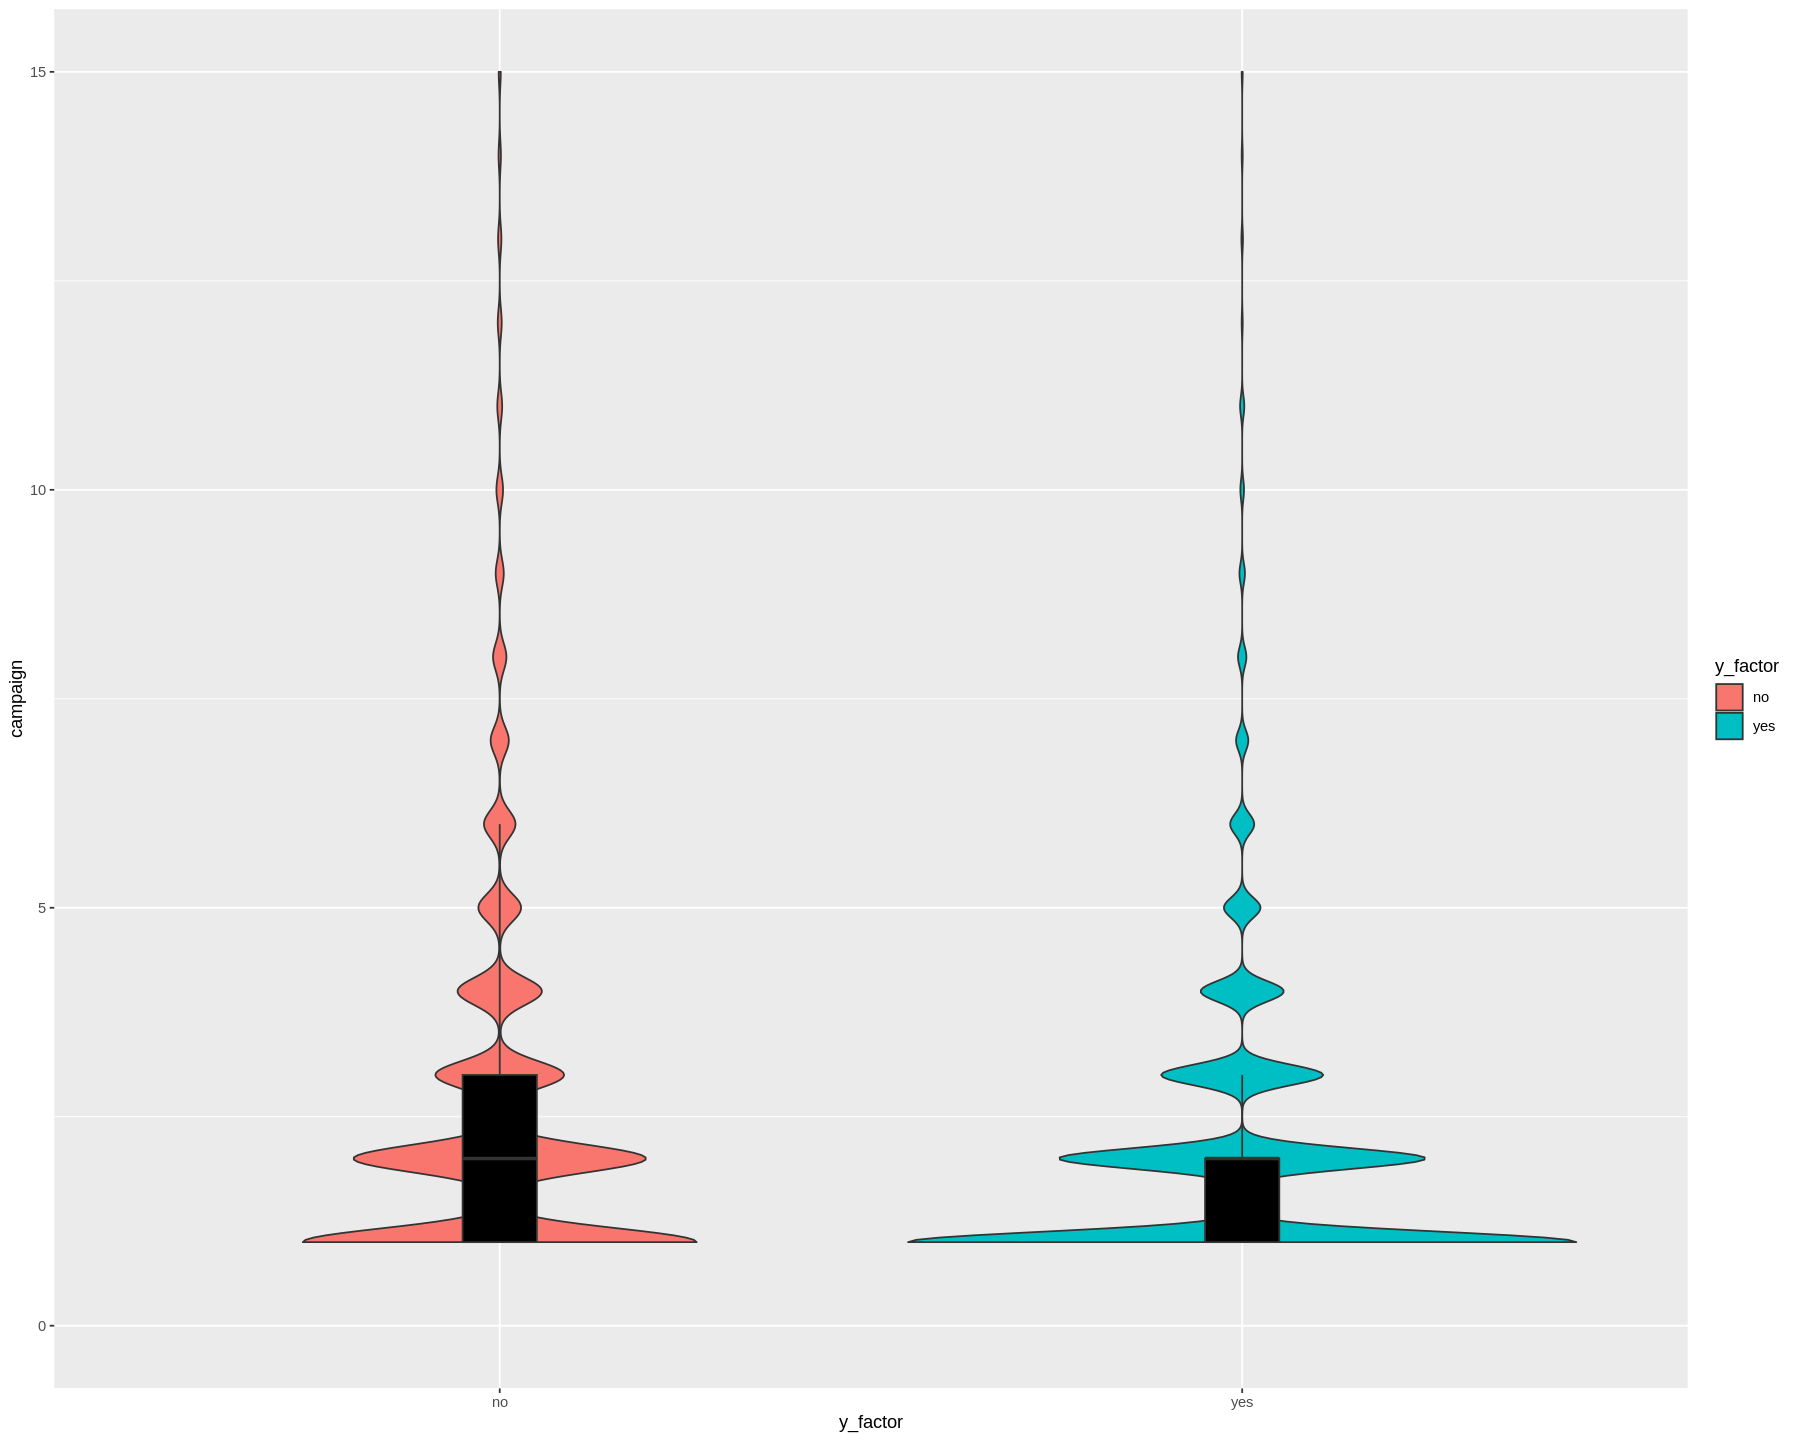

In [113]:
# Graph 5.1 - y axis limit on number of contacts during this campaign for this client in yes and no datasets
hw_p <- ggplot(bank_clean, aes(x = y_factor, y=campaign,fill=y_factor  ))
hw_p + geom_violin() +
  geom_boxplot(width = .1, 
               fill = "black", 
               outlier.colour = NA) + ylim(0,15)
  stat_summary(fun = median, geom = "point", fill = "white", shape = 21, size = 2.5)
# 'yes' population has lower number of contacts during this campaign, mean - 2.14 v 2.85

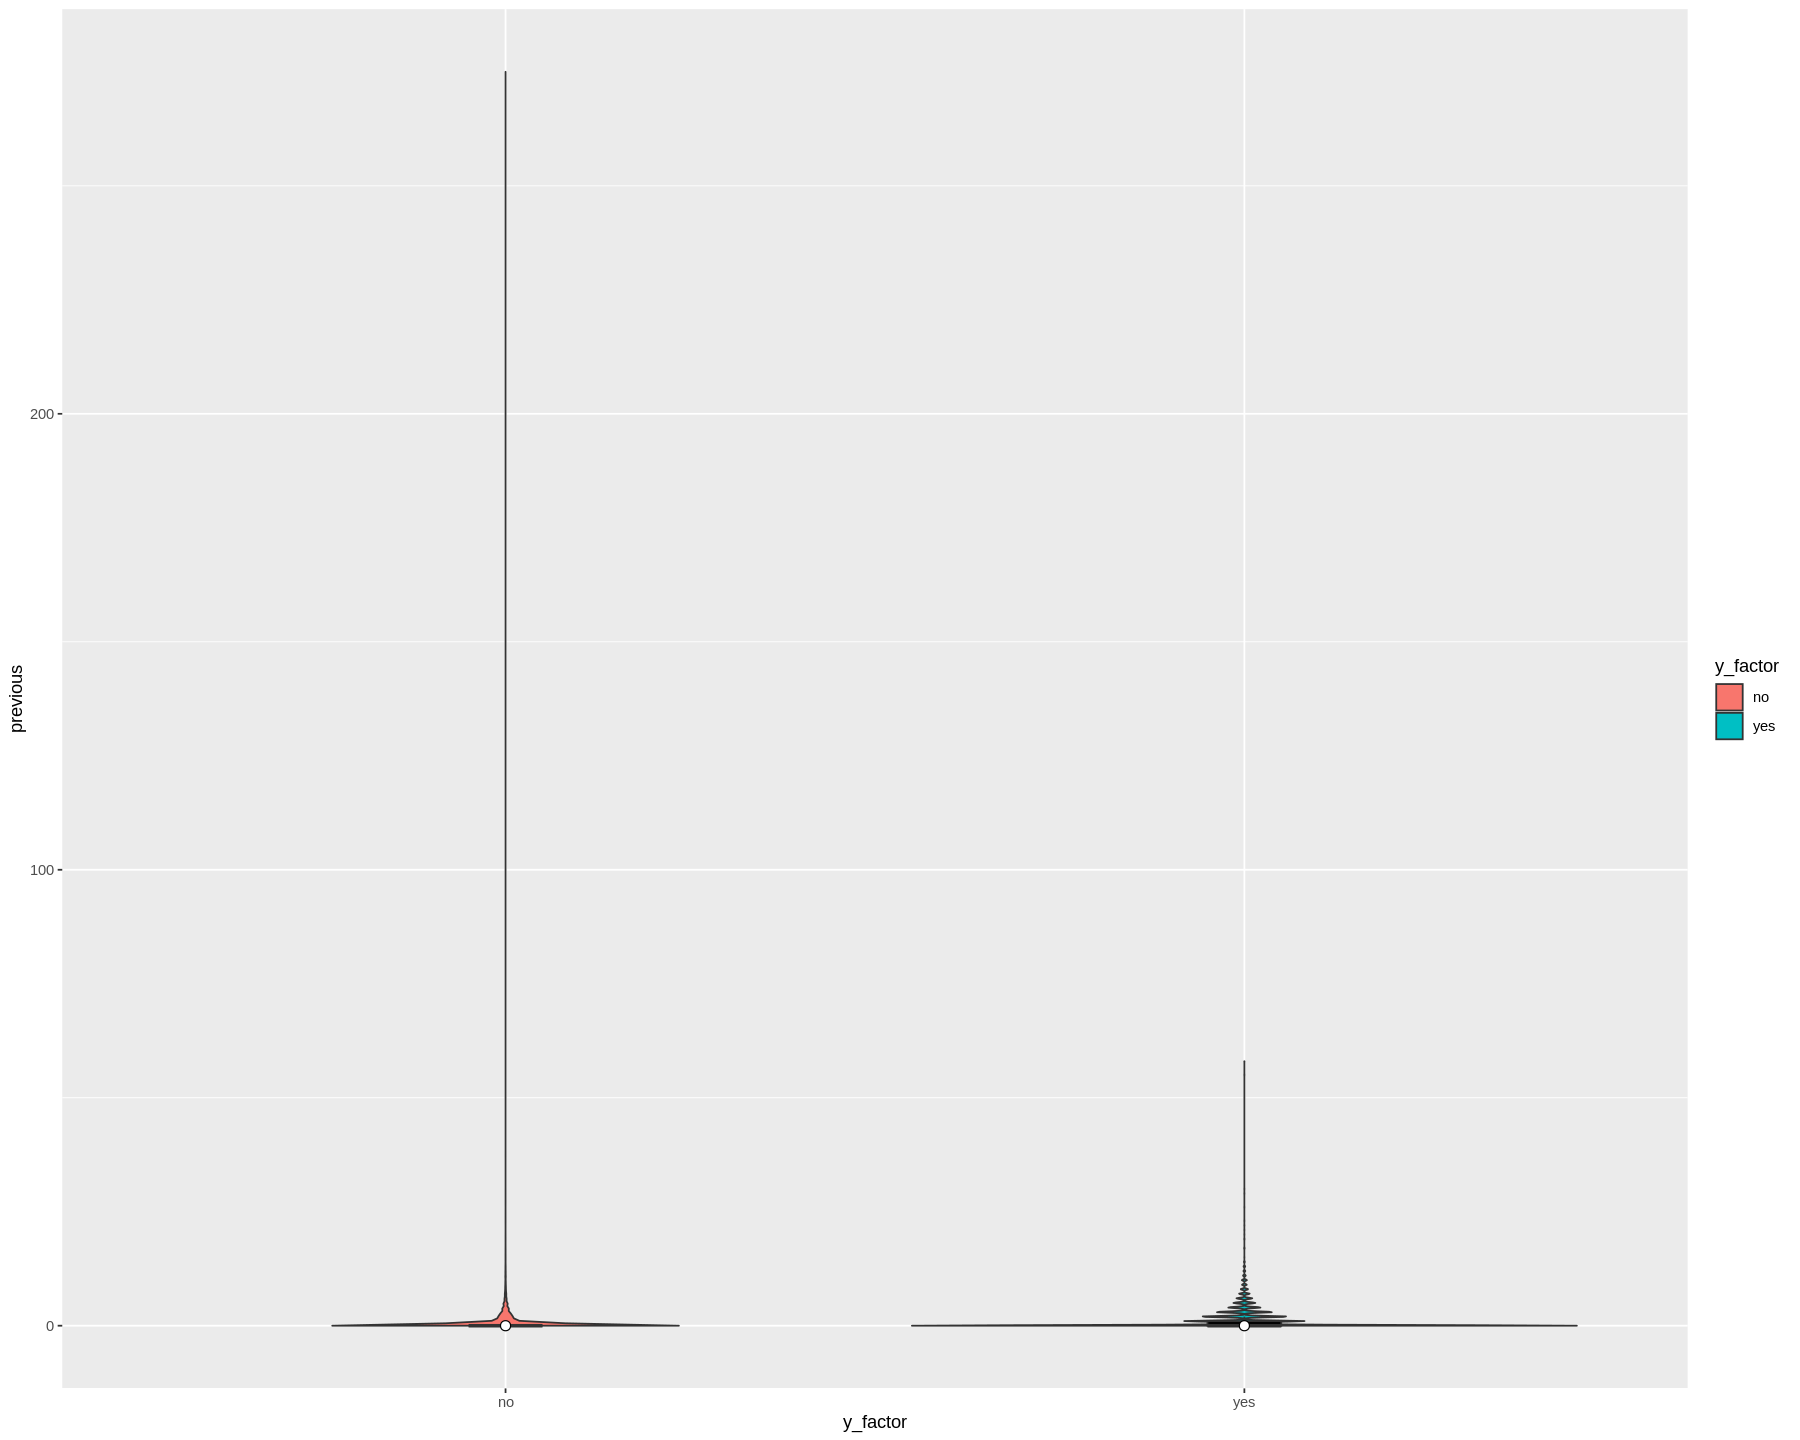

In [115]:
# Graph 6 - number of contacts before this campaign for this client in yes and no datasets
  hw_q <- ggplot(bank_clean, aes(x = y_factor, y=previous,fill=y_factor  ))
hw_q + geom_violin() +
  geom_boxplot(width = .1, 
               fill = "black", 
               outlier.colour = NA) + 
  stat_summary(fun = median, geom = "point", fill = "white", shape = 21, size = 2.5)


Warning message:
“Removed 294 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 294 rows containing non-finite values (`stat_boxplot()`).”


geom_point: na.rm = FALSE
stat_summary: fun.data = NULL, fun = function (x, na.rm = FALSE, ...) 
UseMethod("median"), fun.max = NULL, fun.min = NULL, fun.args = list(), na.rm = FALSE, orientation = NA
position_identity 

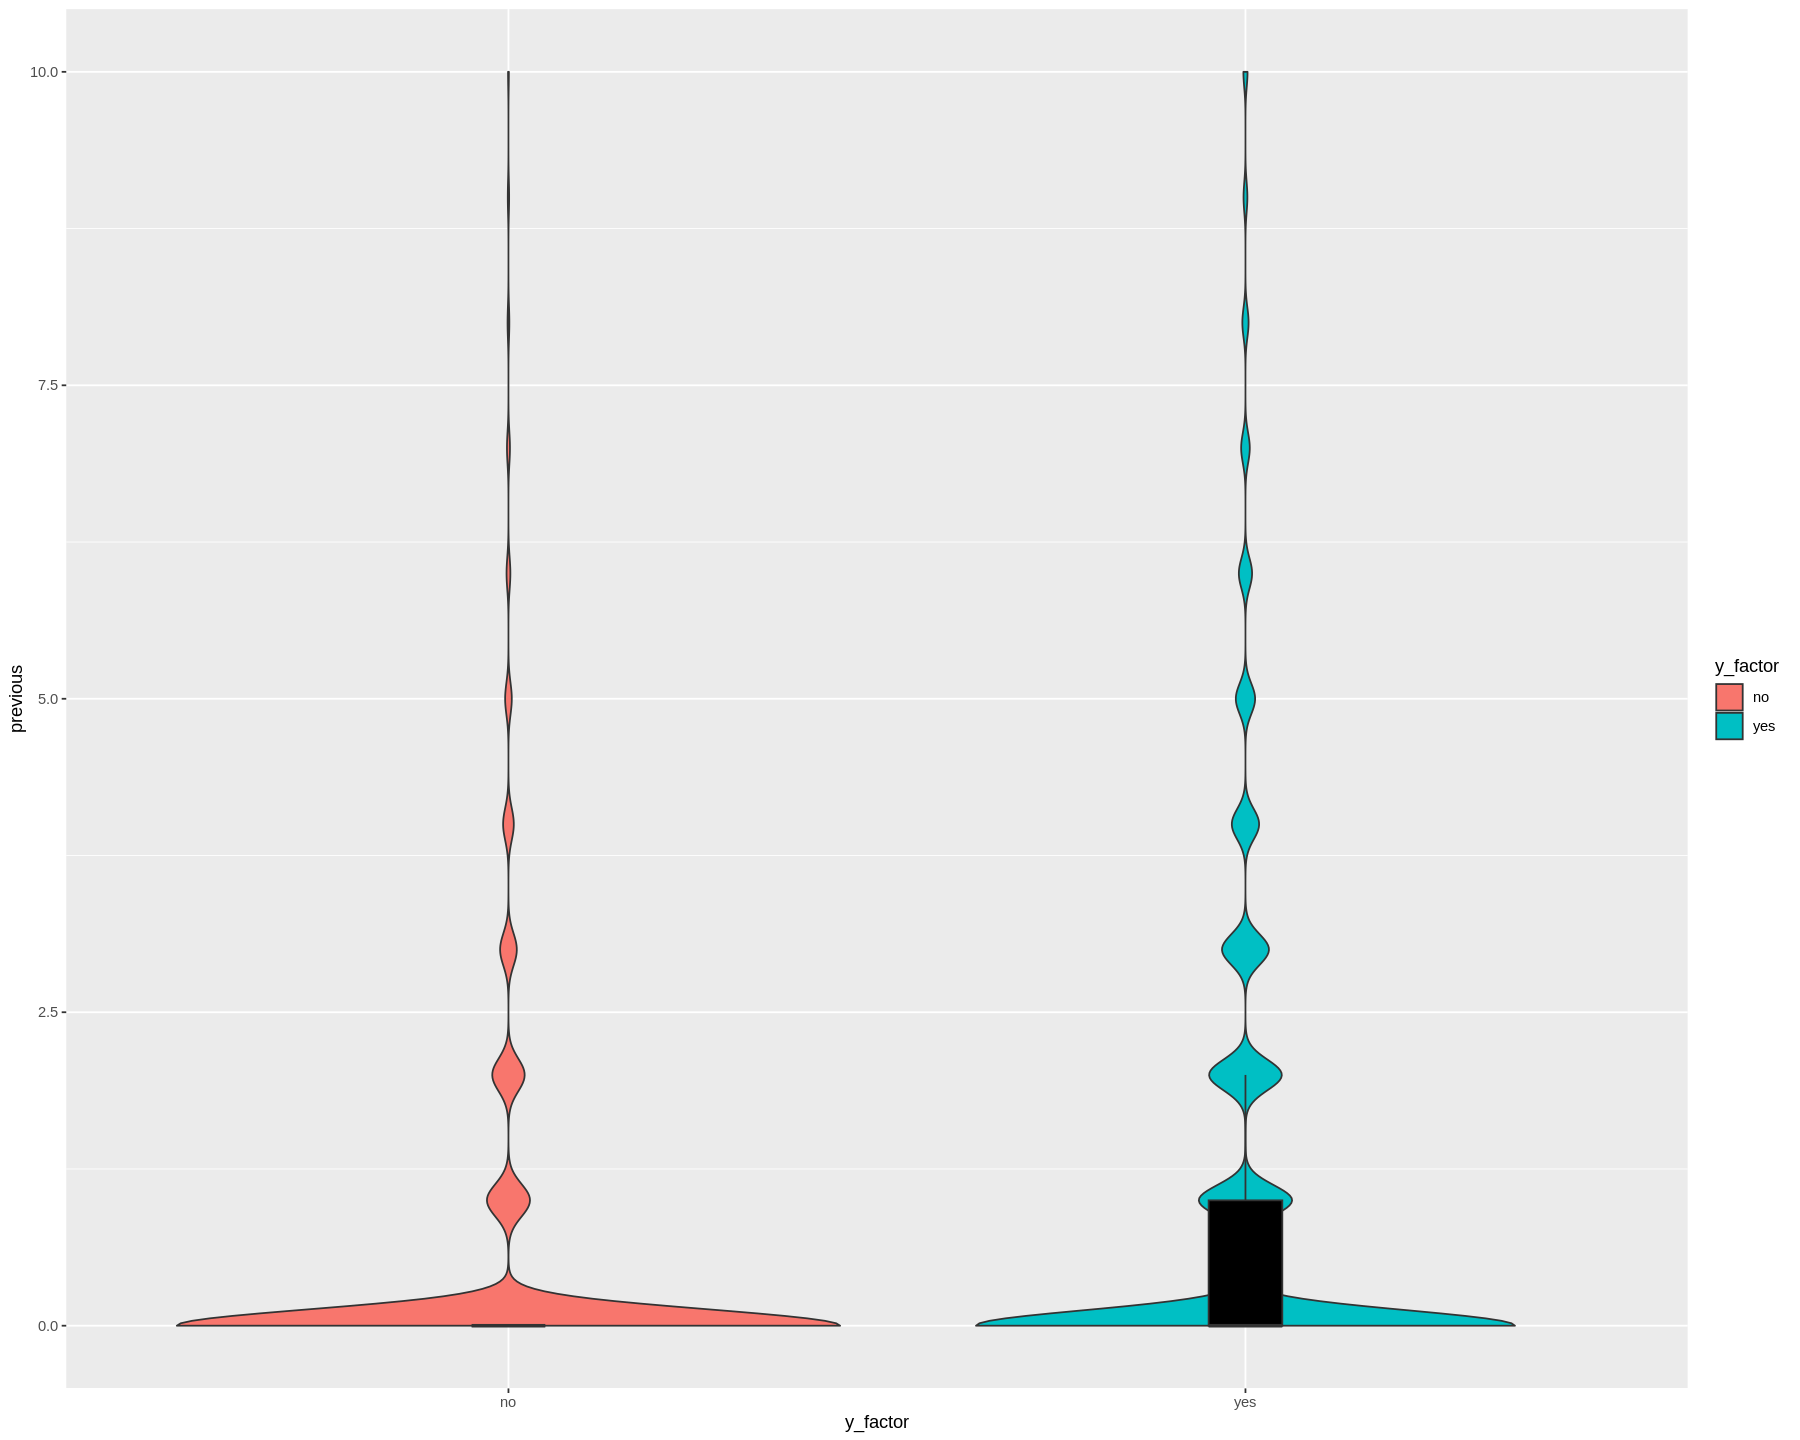

In [116]:
# Graph 6.1 y axis limited with number of contacts before this campaign for this client in yes and no datasets
hw_q <- ggplot(bank_clean, aes(x = y_factor, y=previous,fill=y_factor  ))
hw_q + geom_violin() +
  geom_boxplot(width = .1, 
               fill = "black", 
               outlier.colour = NA) + ylim(0,10)
stat_summary(fun = median, geom = "point", fill = "white", shape = 21, size = 2.5)

In [117]:
mean(bank_clean['previous'][bank_clean['y_factor']=='yes'])
mean(bank_clean['previous'][bank_clean['y_factor']=='no'])
median(bank_clean['previous'][bank_clean['y_factor']=='yes'])
median(bank_clean['previous'][bank_clean['y_factor']=='no'])
# 'yes' population saw more contacts before this campaign, 1.17 v 0.5, 
# but median for both is zero contacts before this campaign


[1] 1.170354

[1] 0.5021542

[1] 0

[1] 0

## Bar charts for the categorical variables
Is the y='yes' population associated with particular common characteristics?   
Main code source is Rhys (2020), section 4.2.3


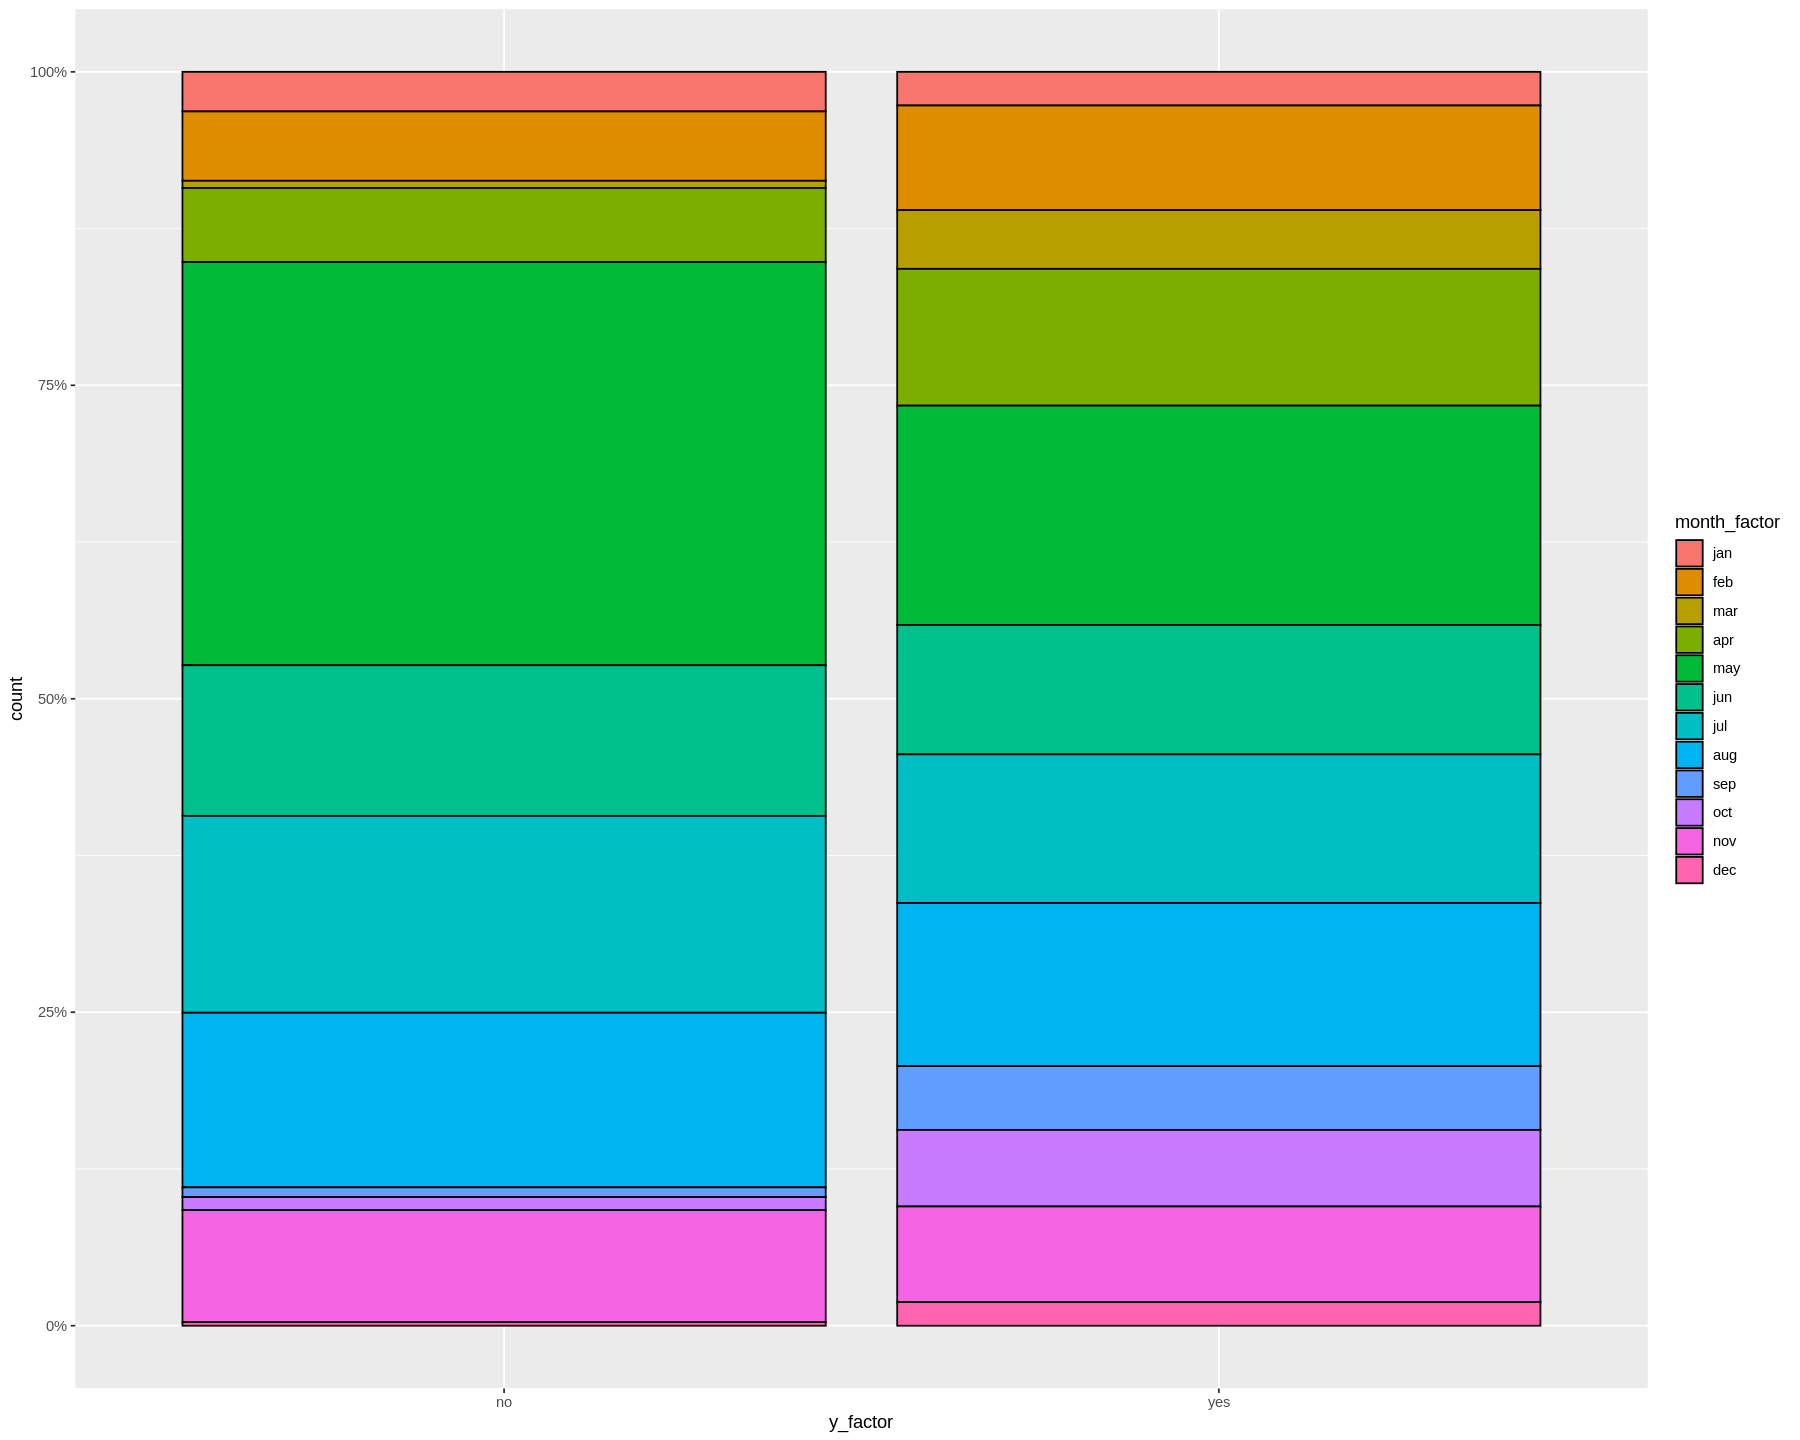

In [118]:
# Graph 7 - Show breakdown of month_factor by 'yes' and 'no' population
ggplot(data=bank_clean,aes(x=y_factor, fill=month_factor)) +
  geom_bar(position = "fill",colour='black') +
  scale_y_continuous(labels = scales::percent)
# In the 'yes' population, Feb, Mar, Apr, Oct are bigger proportion
# May is much bigger in the 'no' population


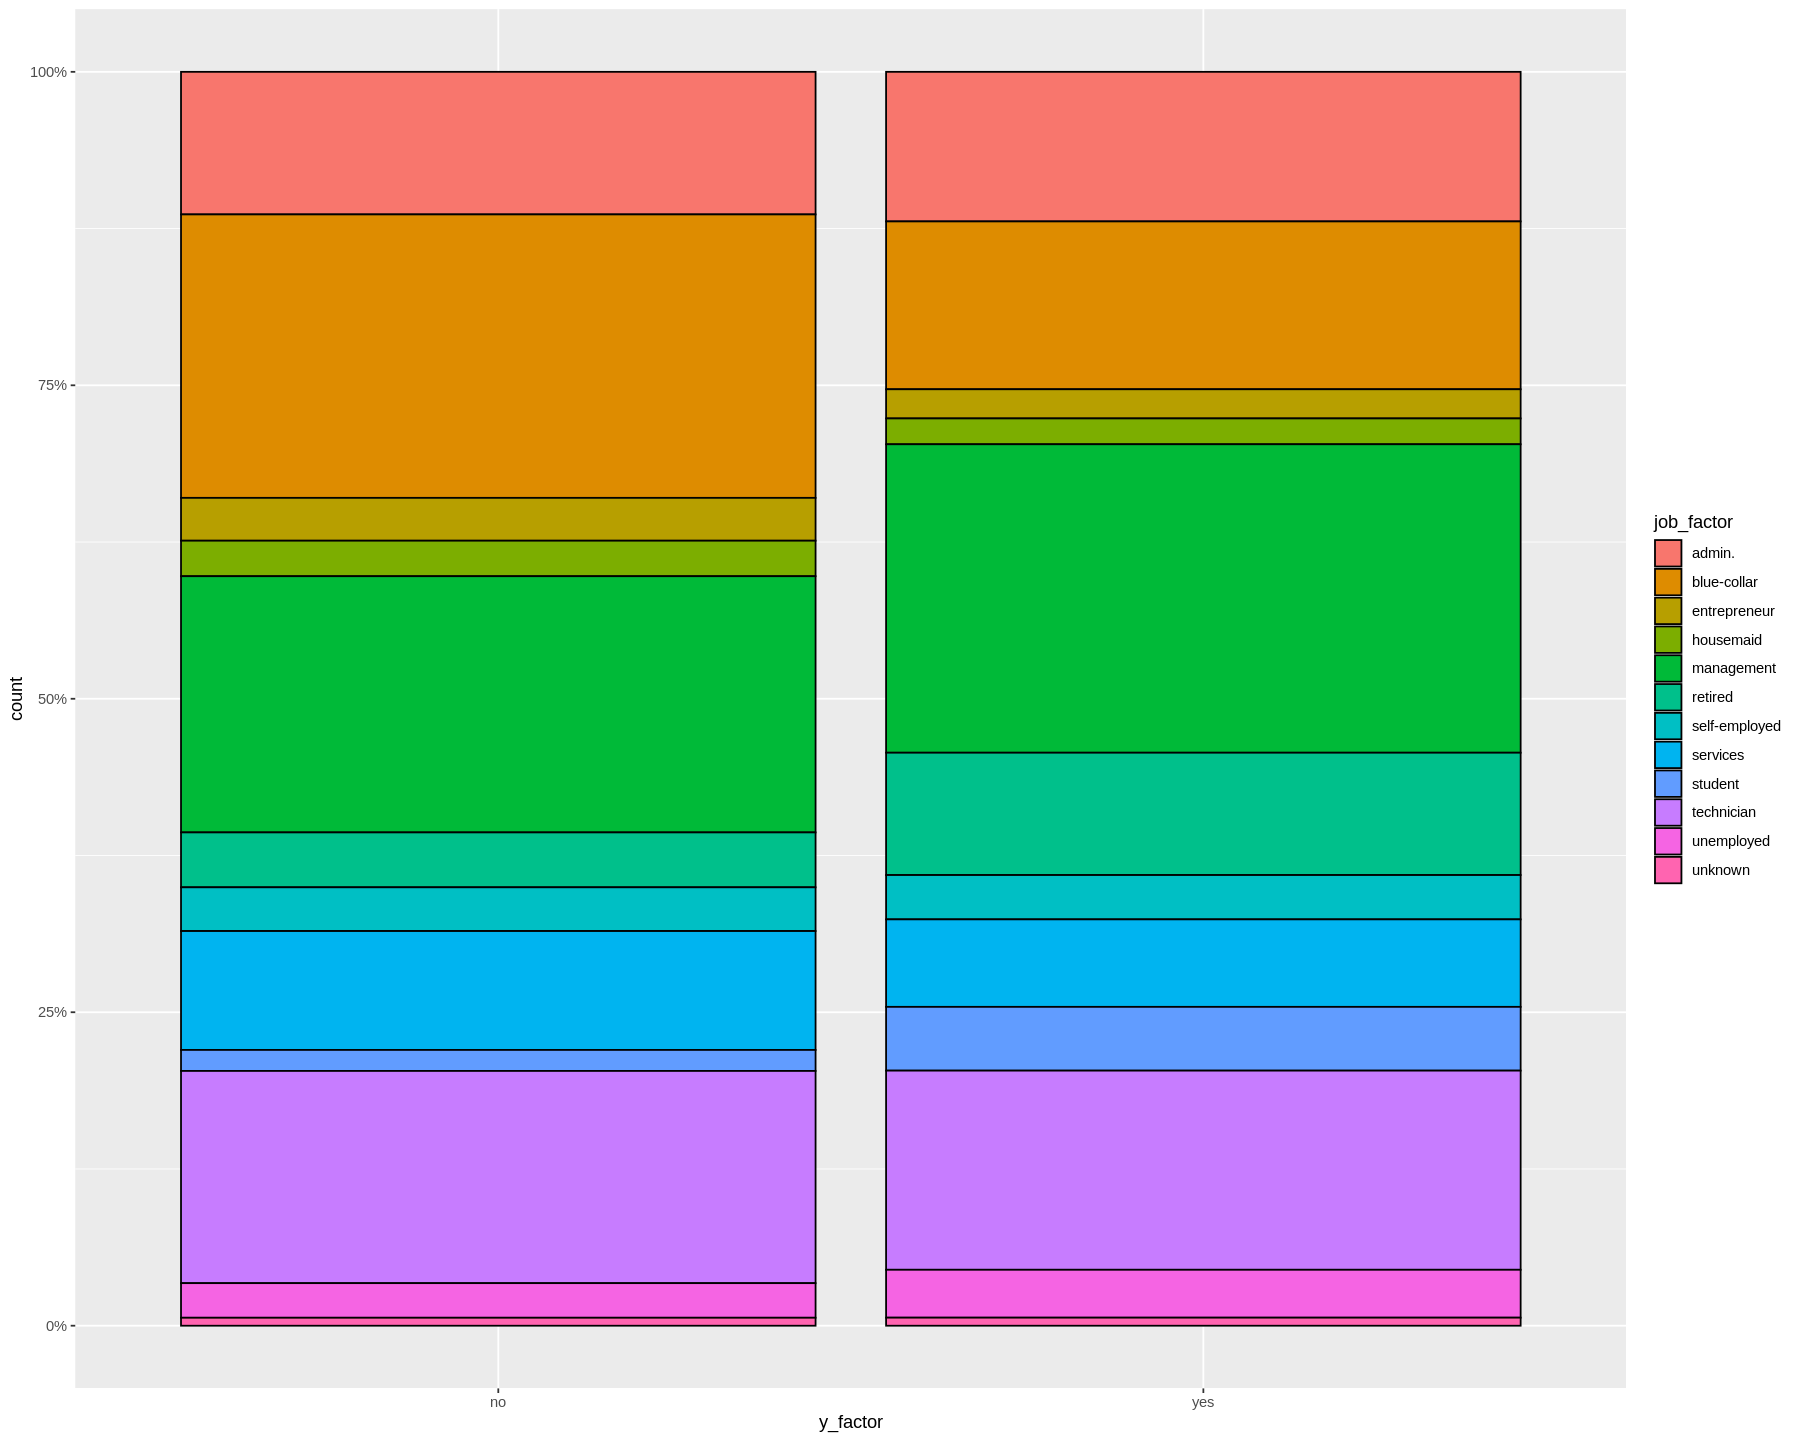

In [119]:
# Graph 8 - Show breakdown of job_factor by 'yes' and 'no' population
ggplot(data=bank_clean,aes(x=y_factor, fill=job_factor)) +
  geom_bar(position = "fill", colour='black') +
  scale_y_continuous(labels = scales::percent)
# 'yes' population has less job=blue-collar, more retired, some more student 

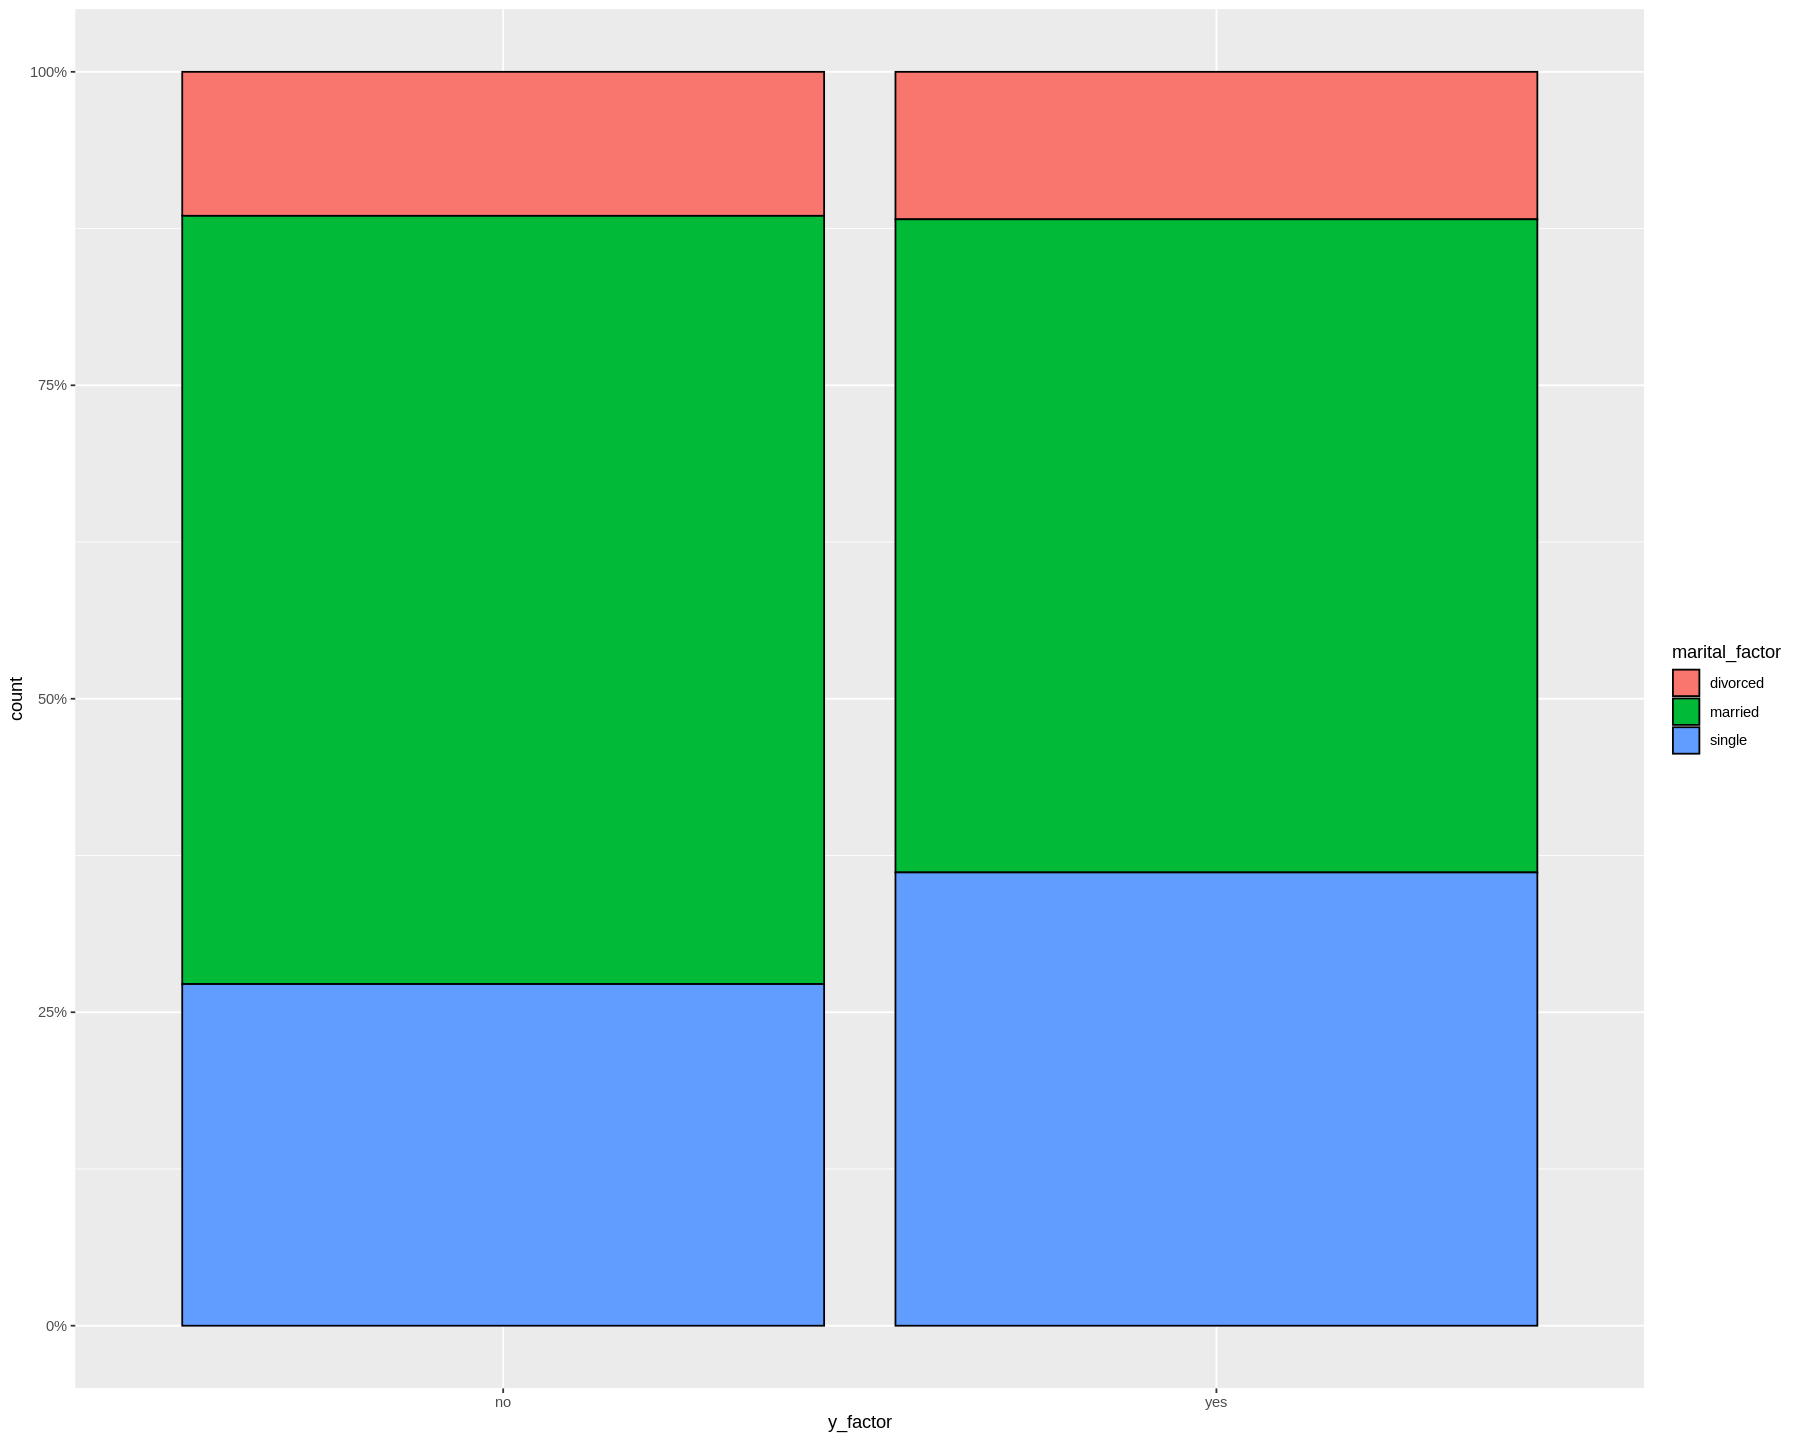

In [120]:
# Graph 9 - Show breakdown of marital_factor by 'yes' and 'no' population
ggplot(data=bank_clean,aes(x=y_factor, fill=marital_factor)) +
  geom_bar(position = "fill",colour='black') +
  scale_y_continuous(labels = scales::percent)

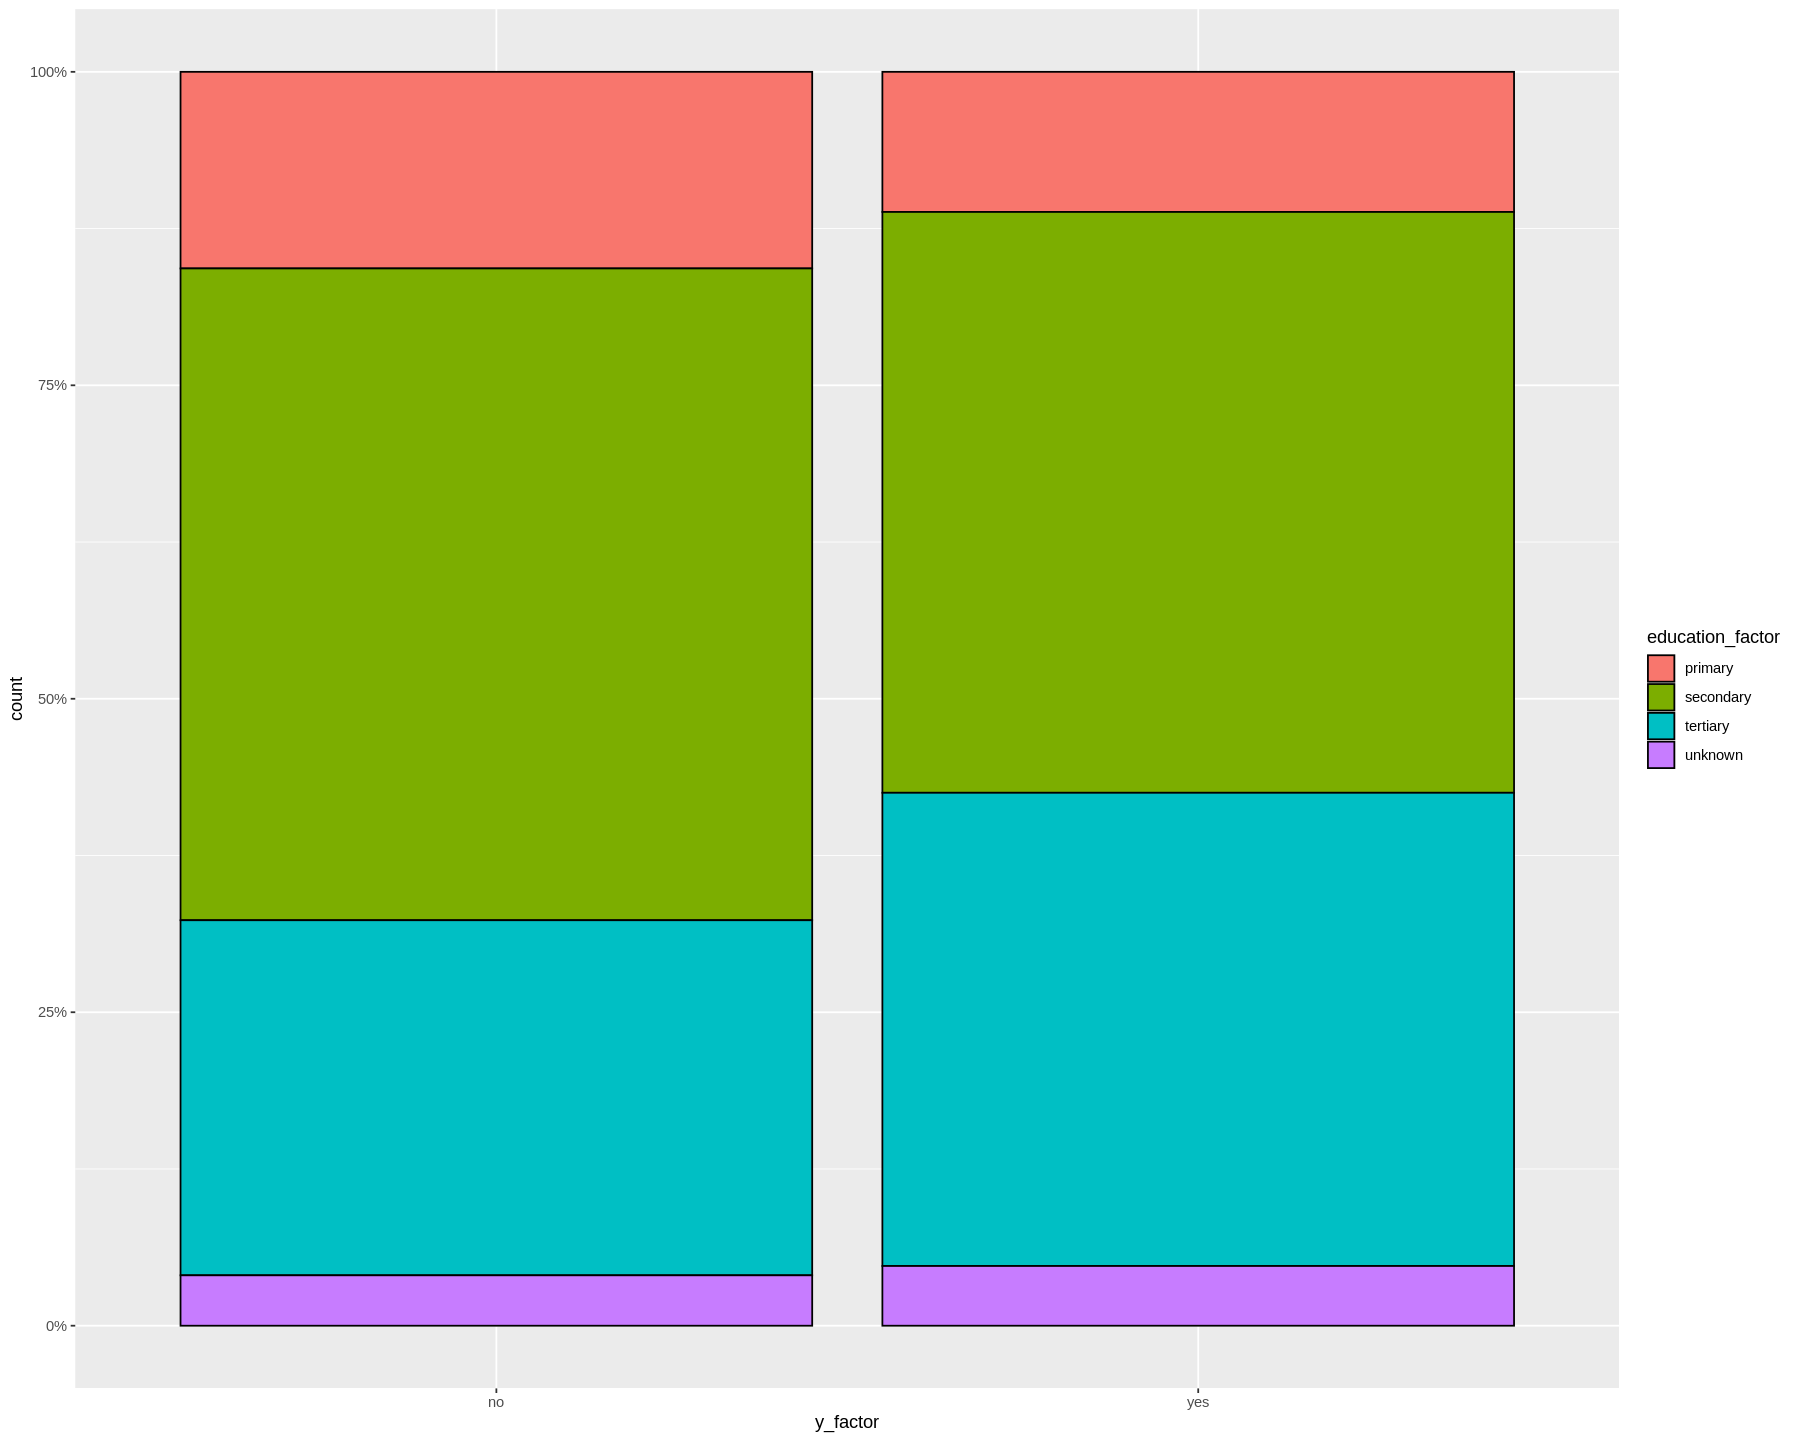

In [121]:
# Graph 10 - Show breakdown of education_factor by 'yes' and 'no' population
ggplot(data=bank_clean,aes(x=y_factor, fill=education_factor)) +
  geom_bar(position = "fill",colour='black') +
  scale_y_continuous(labels = scales::percent)
# more third-level education and fewer primary, 
# which we would expect as the more educated are more affluent customers, 


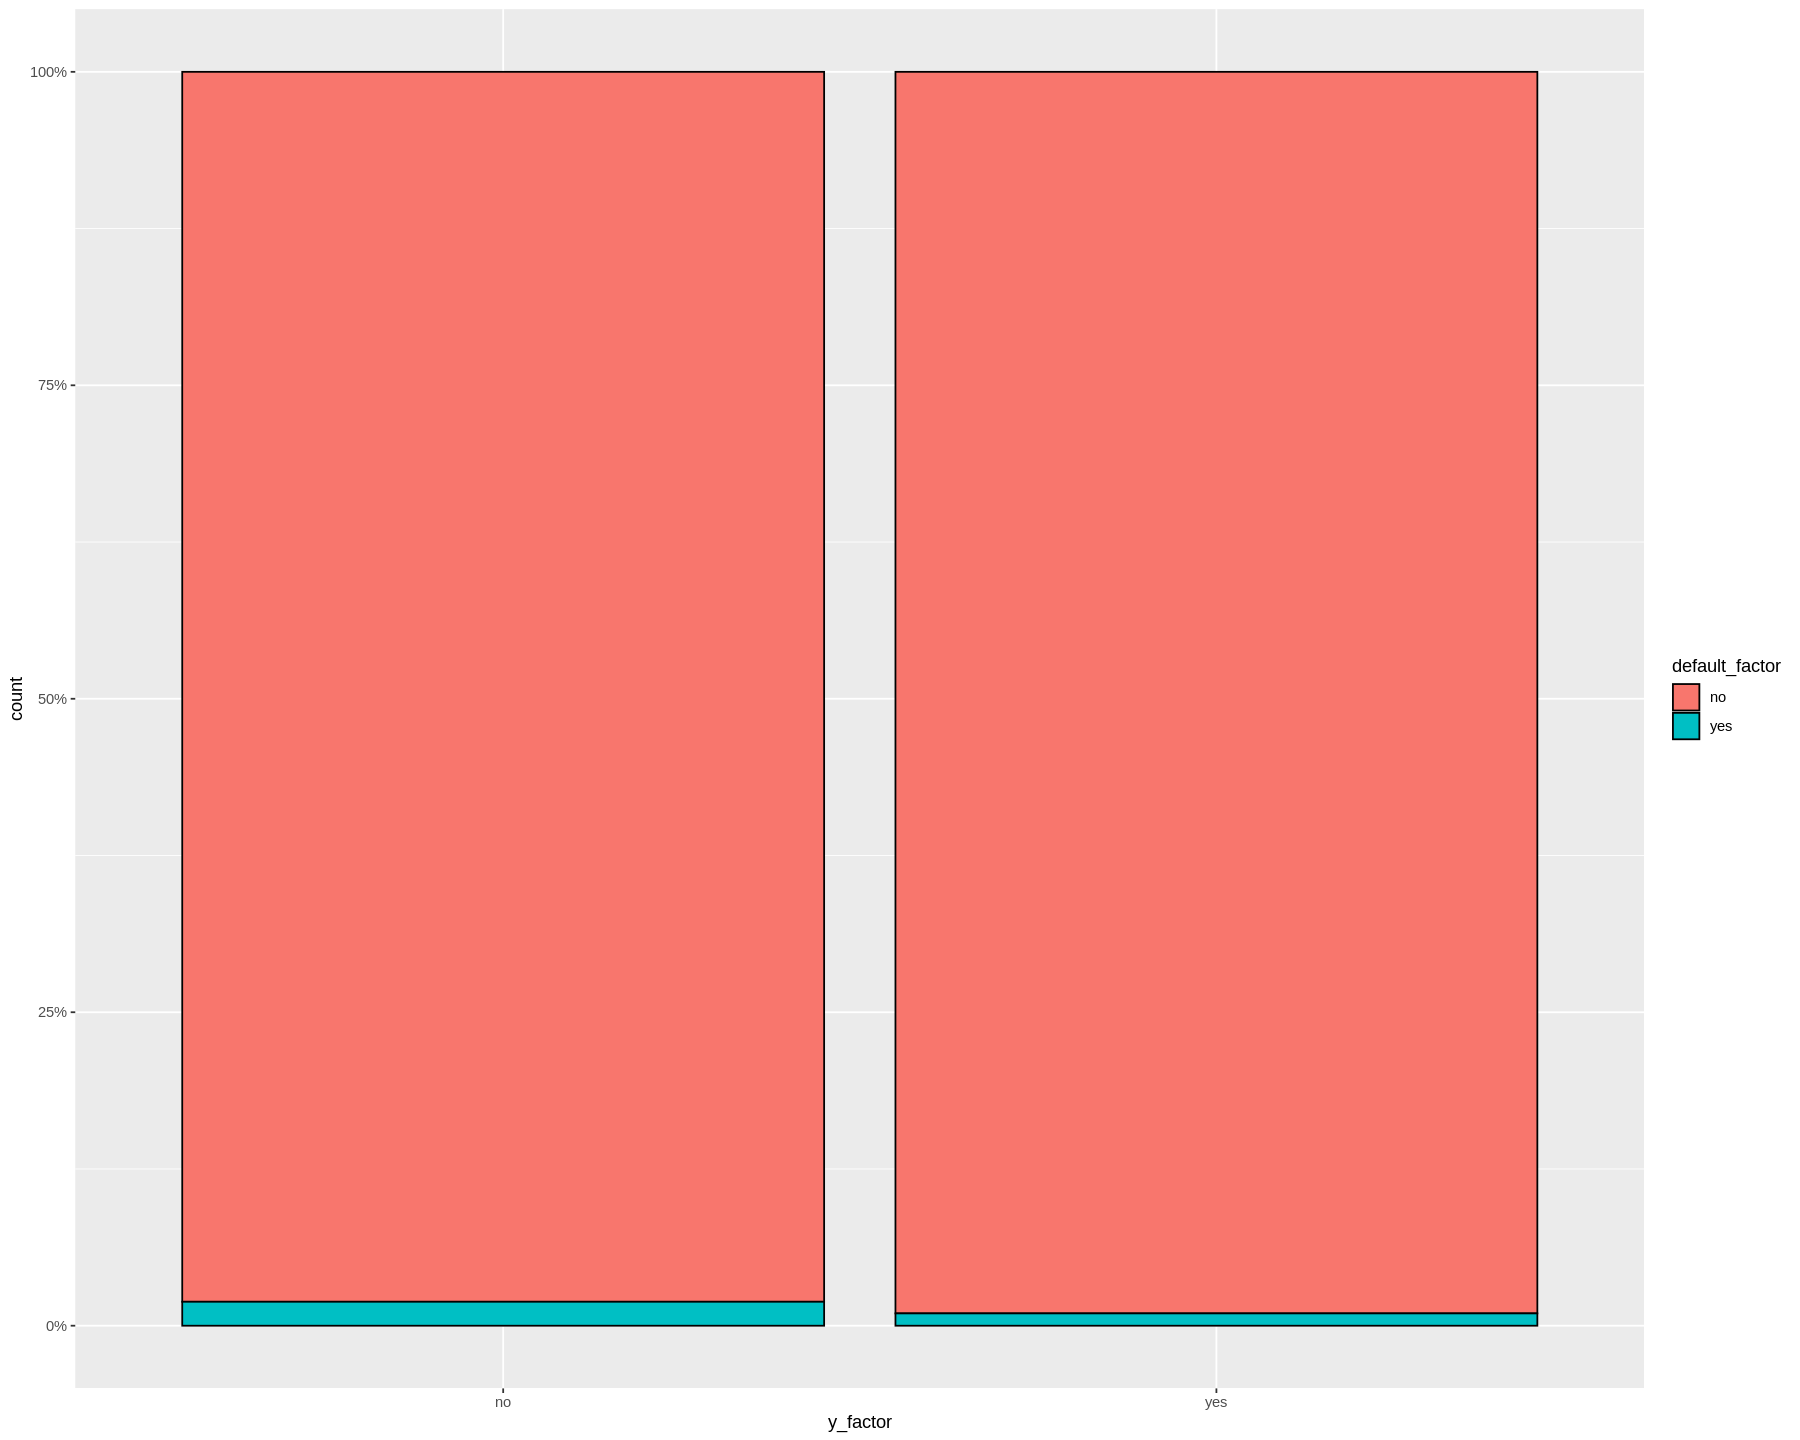

In [125]:
# Graph 11- Show breakdown of default_factor by 'yes' and 'no' population
ggplot(data=bank_clean,aes(x=y_factor, fill=default_factor)) +
  geom_bar(position = "fill",colour='black') +
  scale_y_continuous(labels = scales::percent)
# defaulted customers are a very small percentage of both 'yes' and 'no'

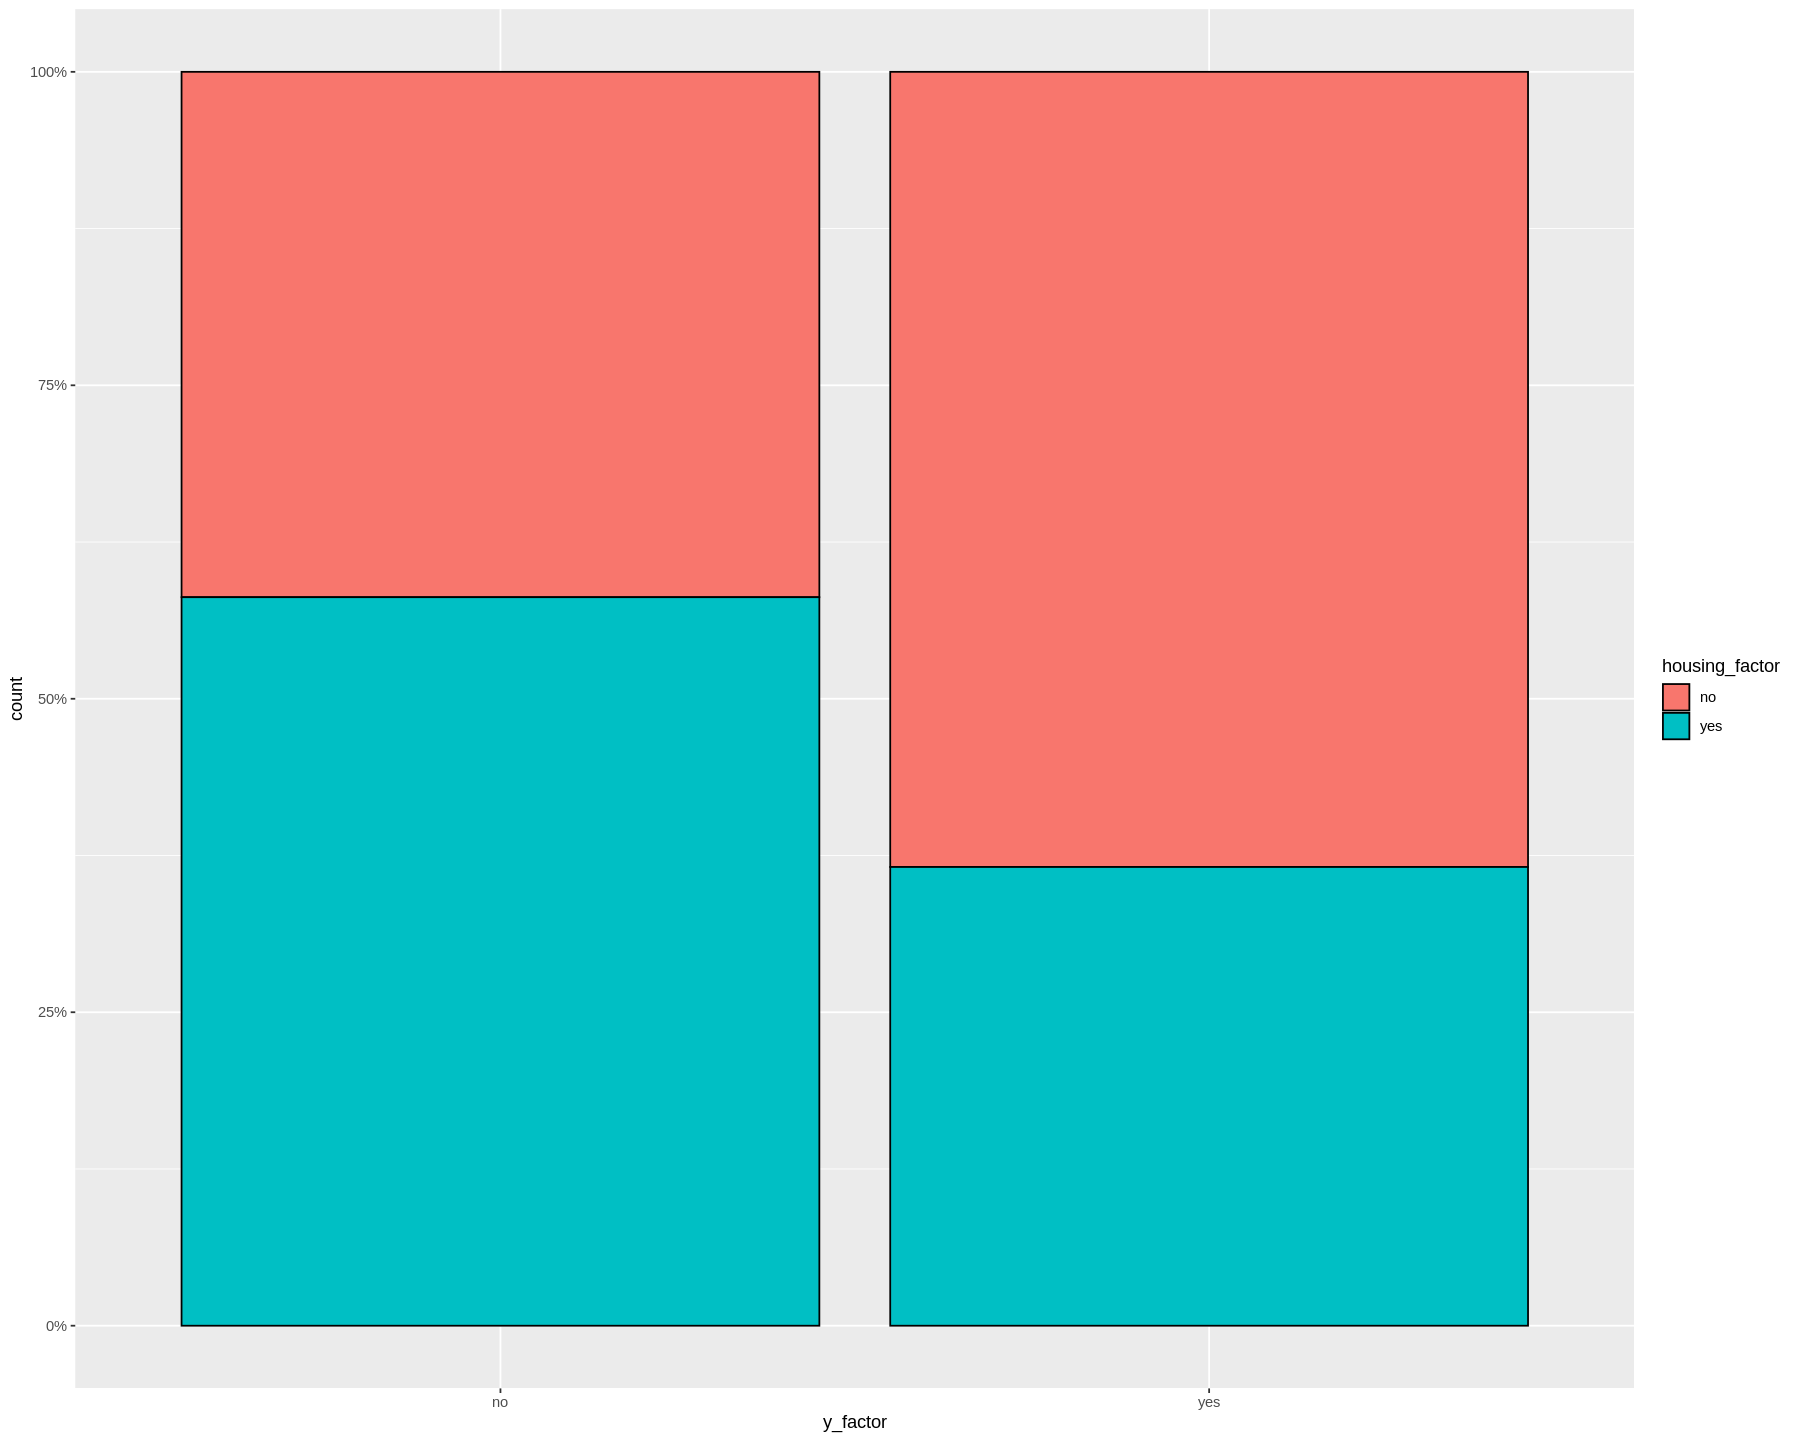

In [126]:
# Graph 12 - Show breakdown of housing_factor by 'yes' and 'no' population
ggplot(data=bank_clean,aes(x=y_factor, fill=housing_factor)) +
  geom_bar(position = "fill",colour='black') +
  scale_y_continuous(labels = scales::percent)
# 'yes' customers are significantly less likely to have a mortgage
# They may be saving for a house purchase?  


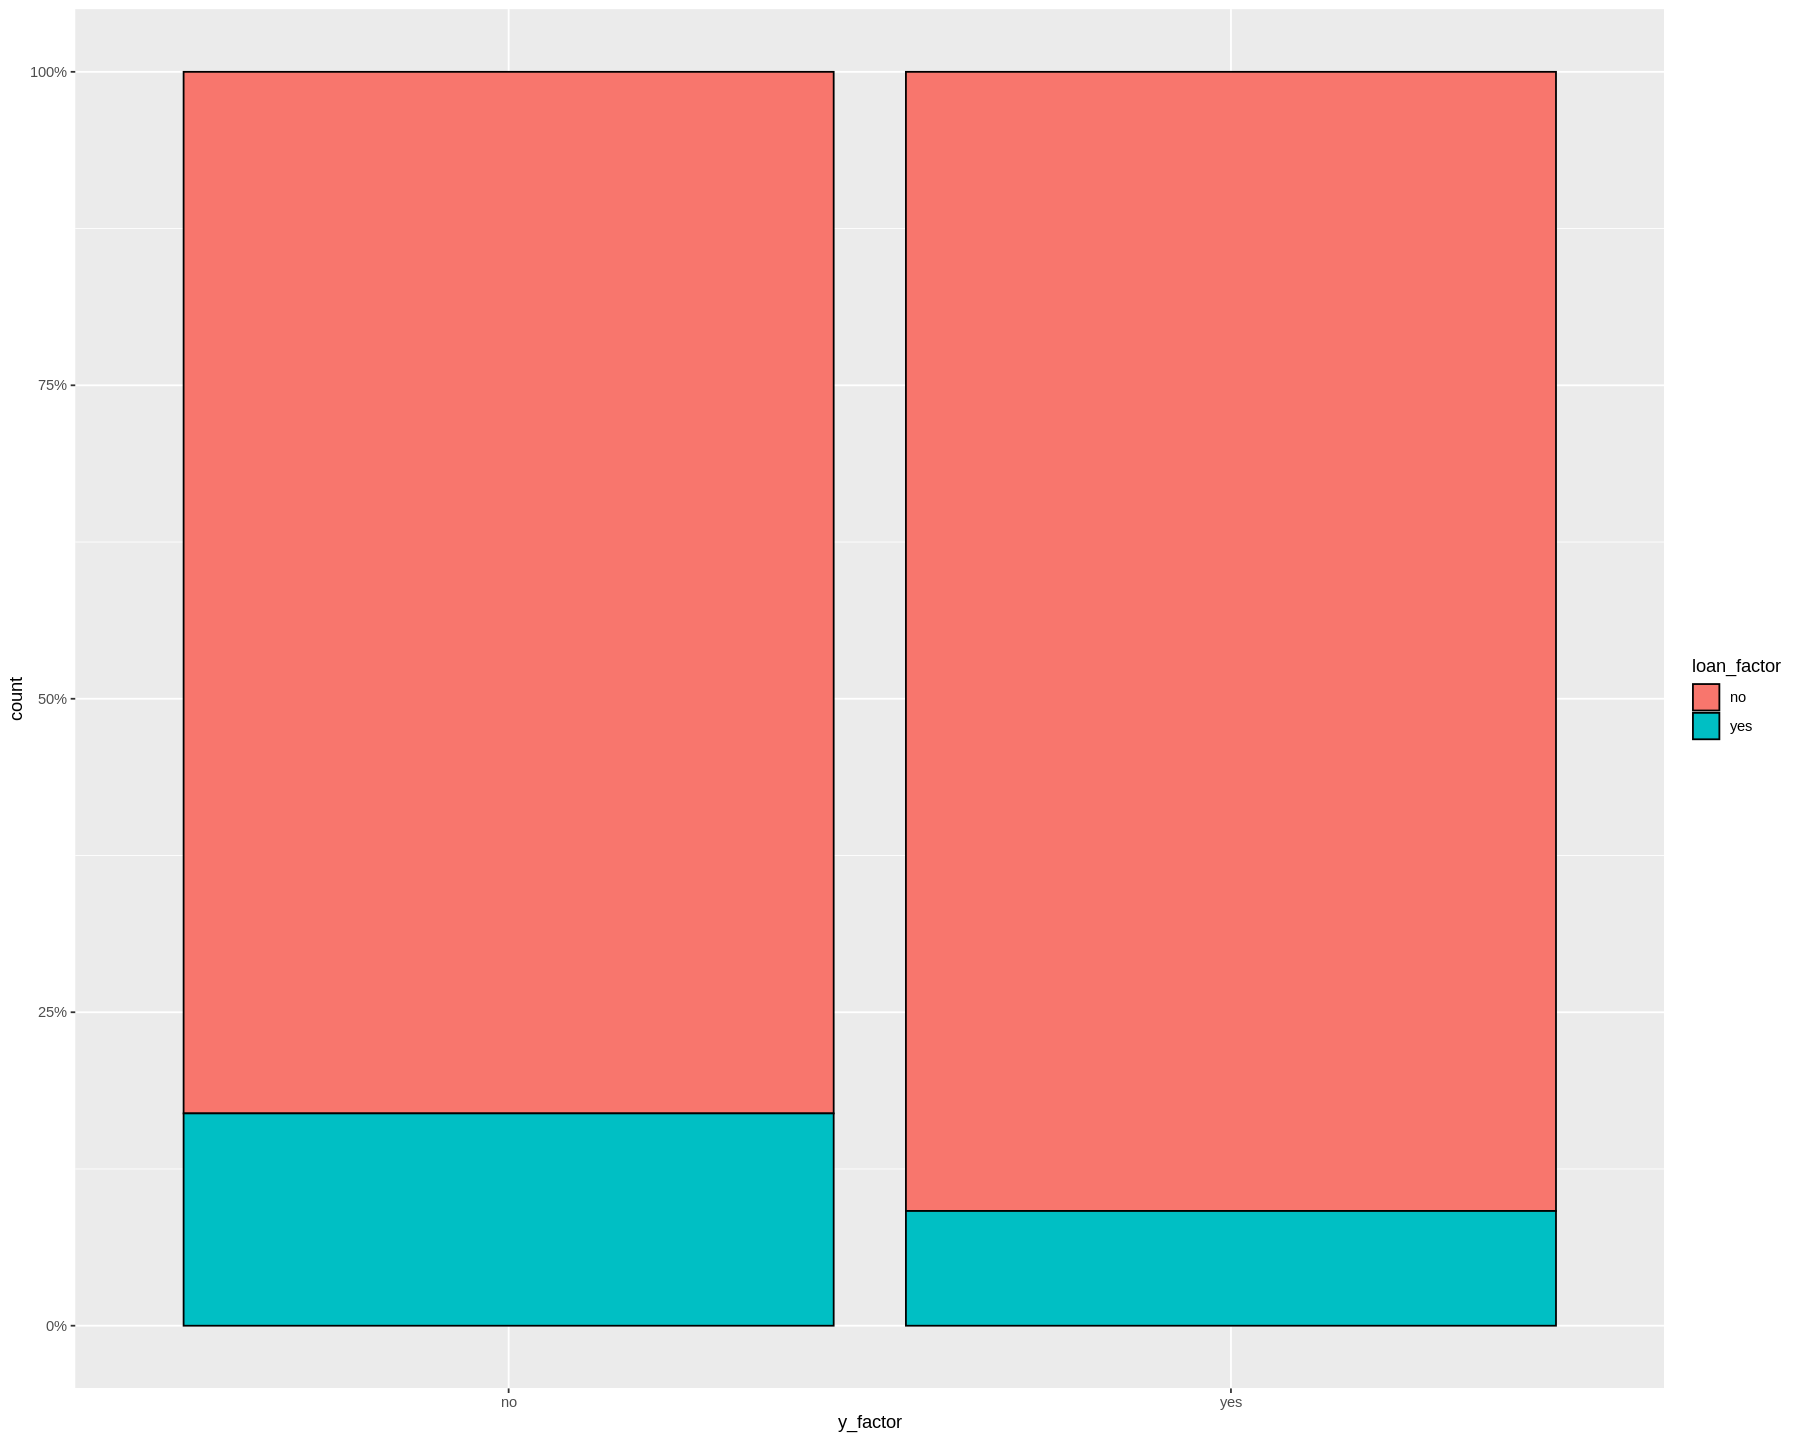

In [127]:
# Graph 13- Show breakdown of loan_factor by 'yes' and 'no' population
ggplot(data=bank_clean,aes(x=y_factor, fill=loan_factor)) +
  geom_bar(position = "fill",colour='black') +
  scale_y_continuous(labels = scales::percent)
# 'has personal loan' more likely for 'no' customers

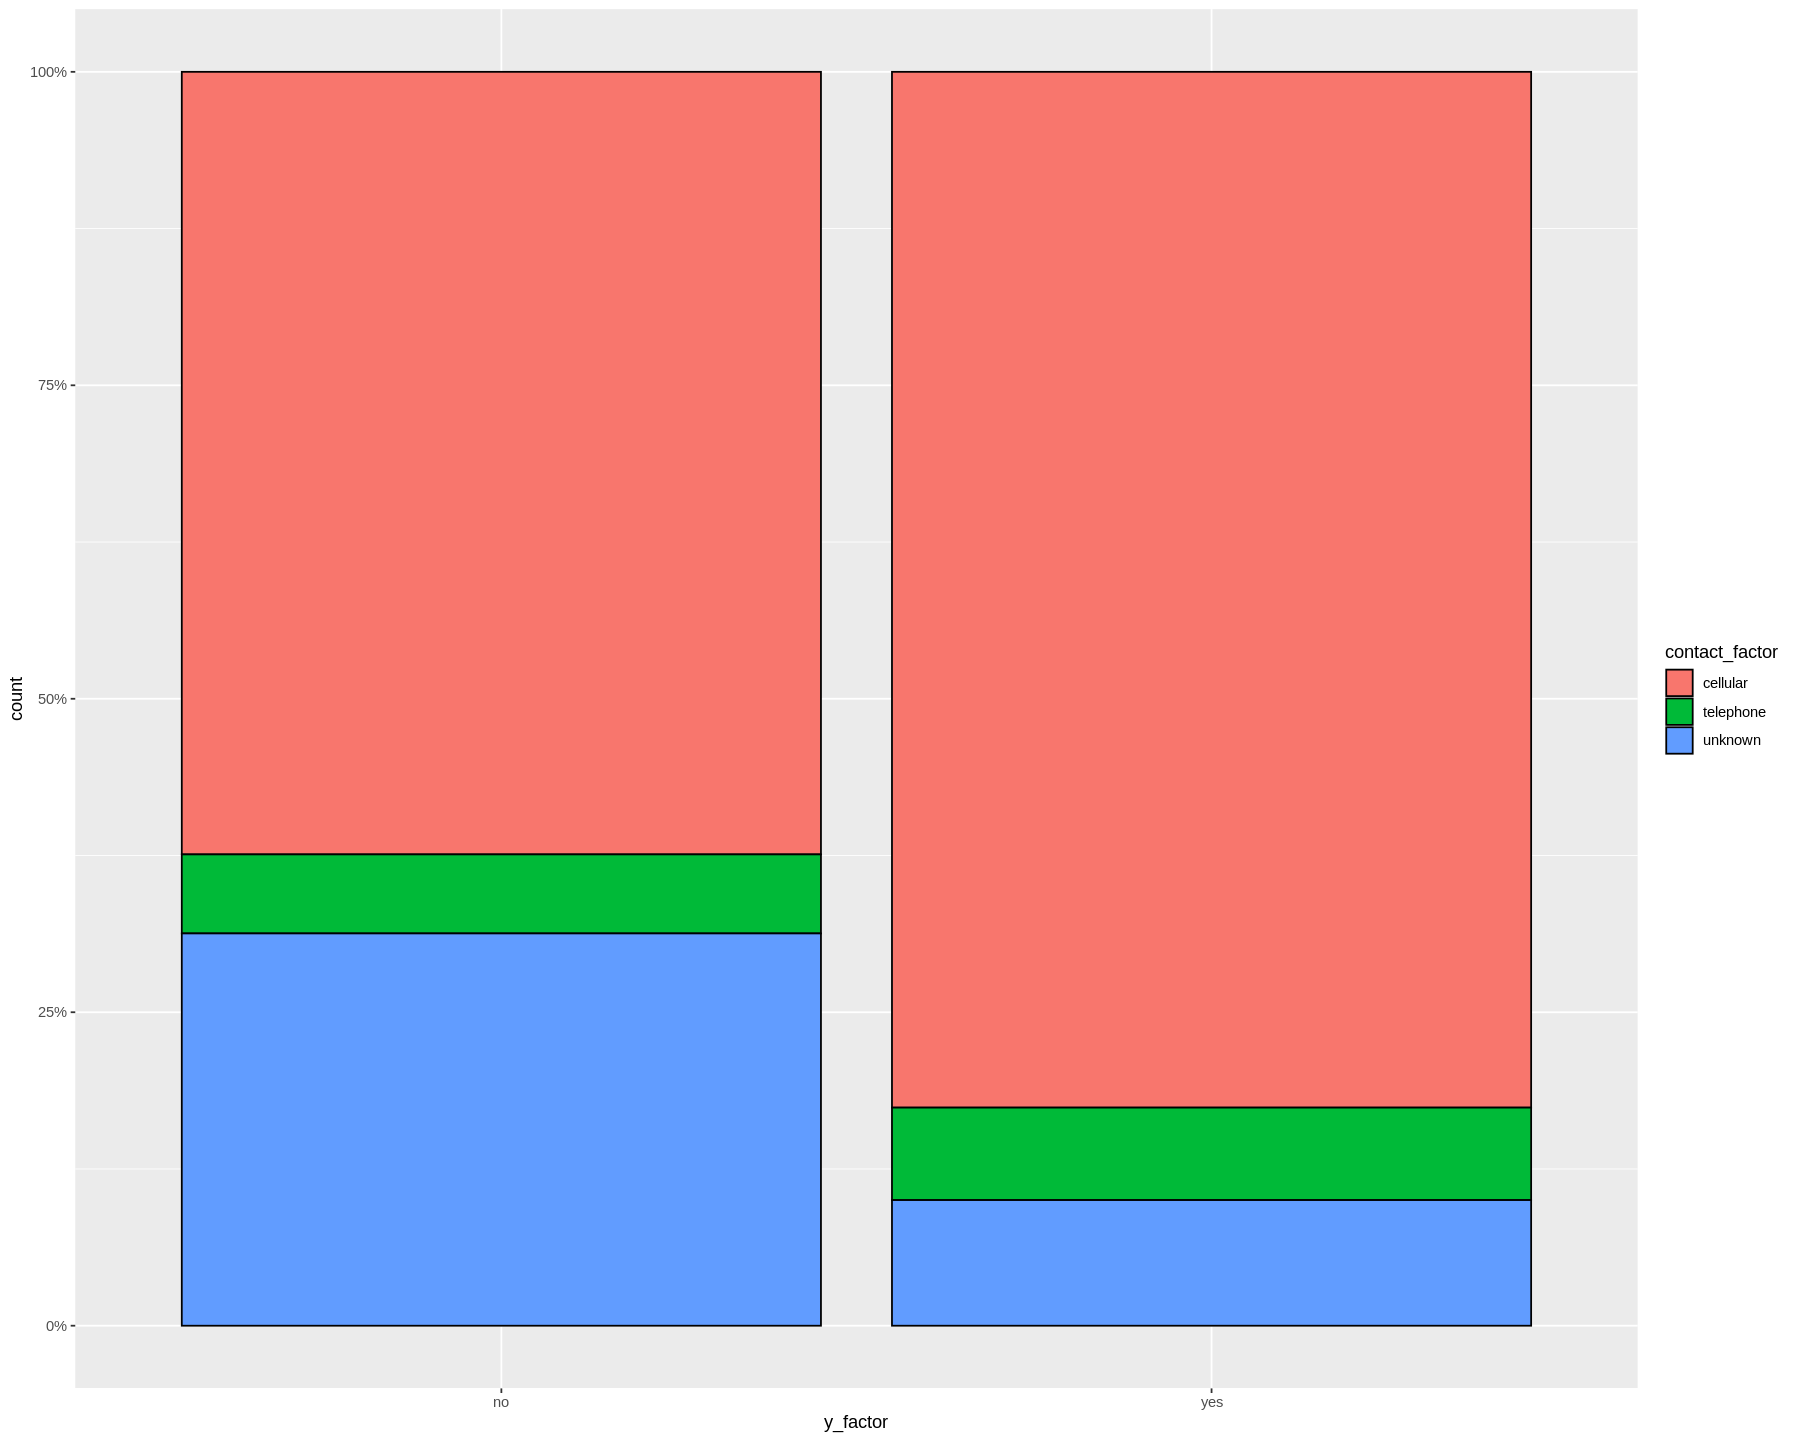

In [128]:
ggplot(data=bank_clean,aes(x=y_factor, fill=contact_factor)) +
  geom_bar(position = "fill",colour='black') +
  scale_y_continuous(labels = scales::percent)

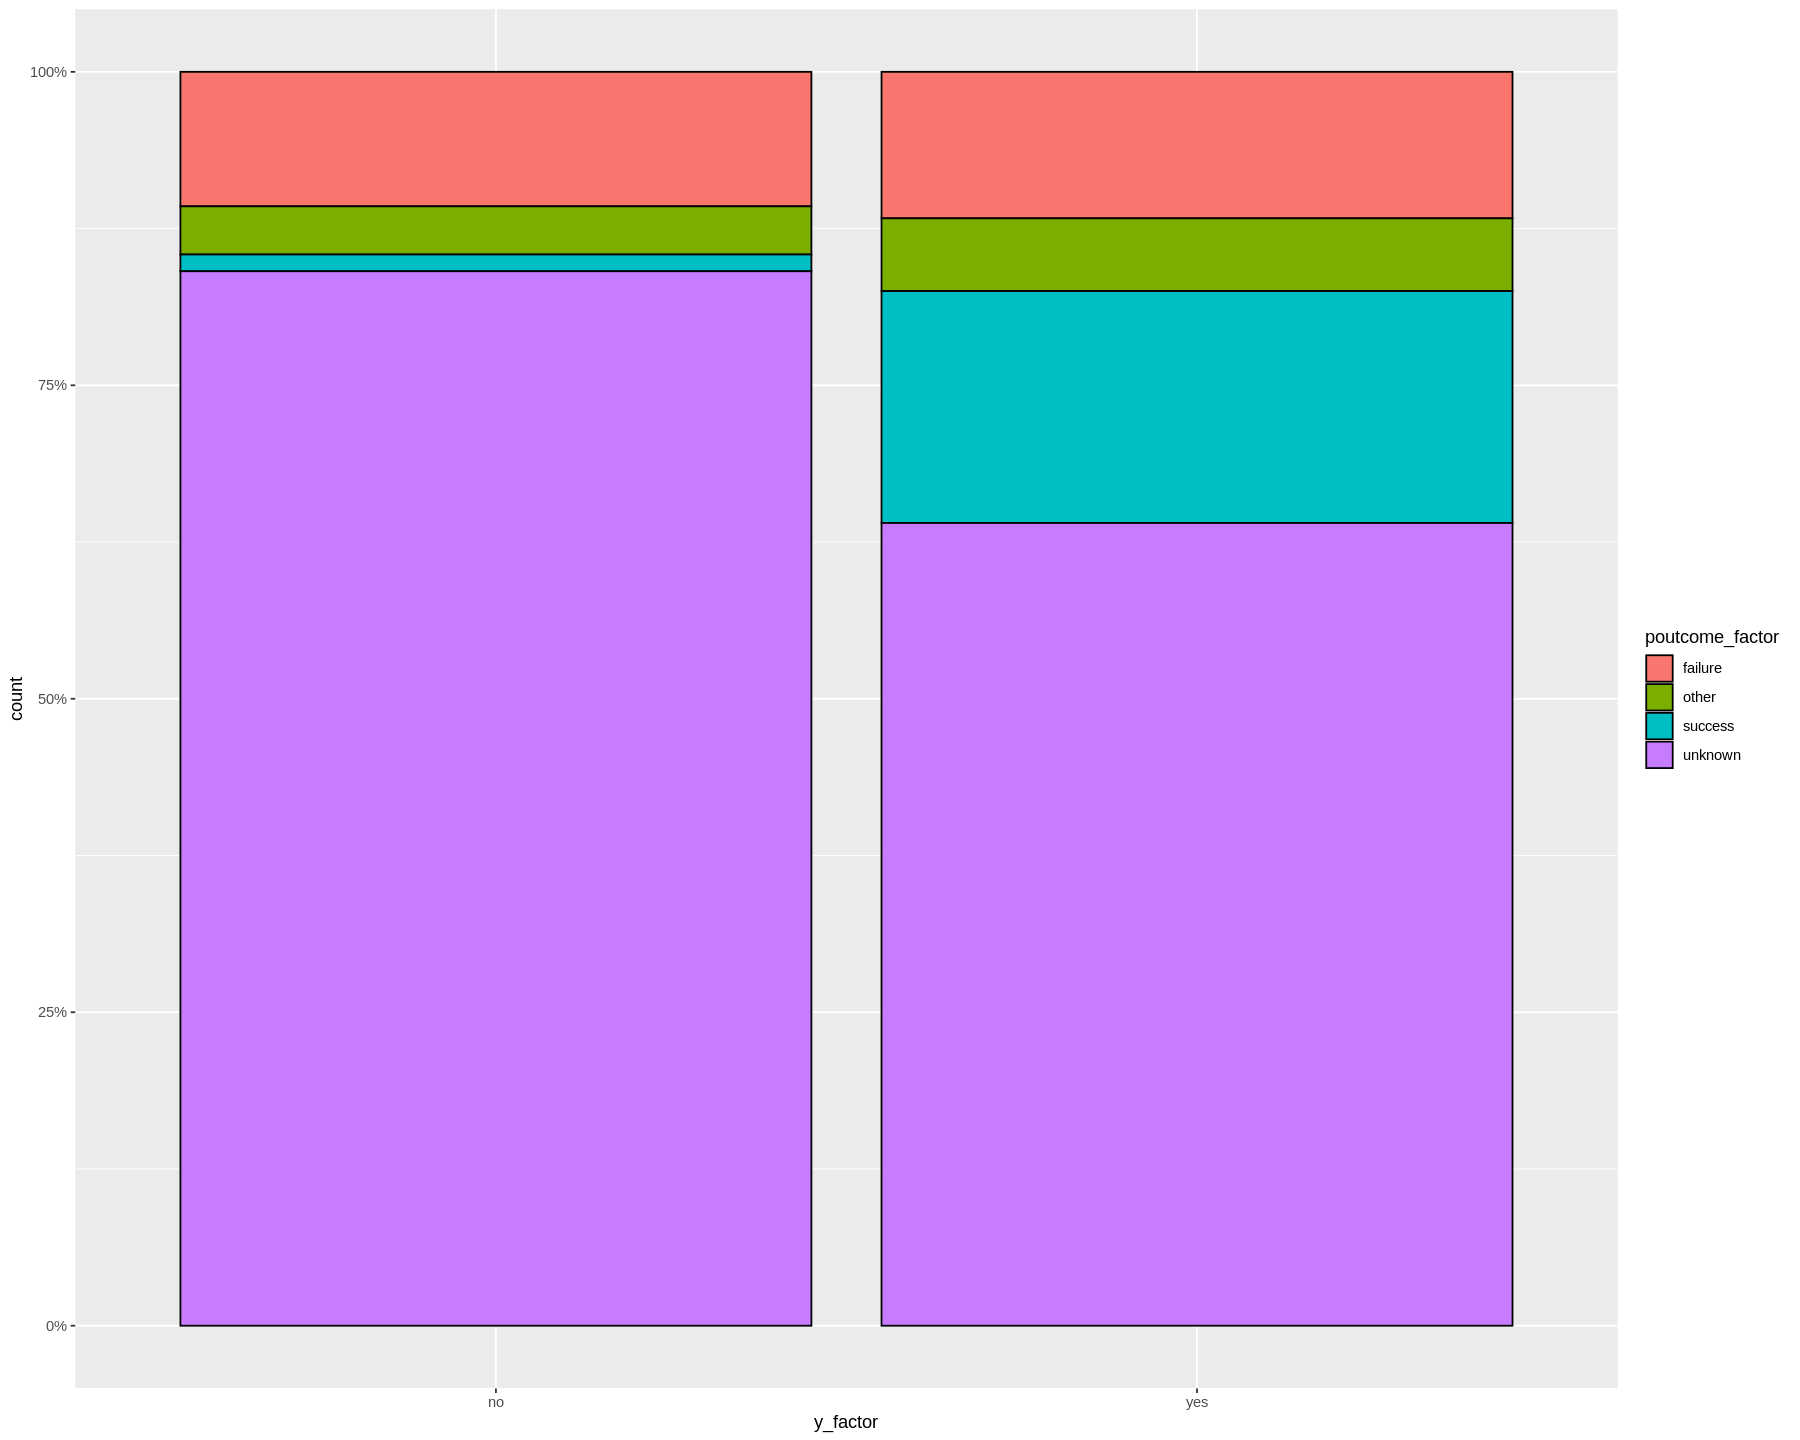

In [129]:
# Show breakdown of poutcome_factor by 'yes' and 'no' population
ggplot(data=bank_clean,aes(x=y_factor, fill=poutcome_factor)) +
  geom_bar(position = "fill",colour='black') +
  scale_y_continuous(labels = scales::percent)
# Previous success with the client is significantly higher among 'yes' customers 


# Model Fitting

In [131]:
glm.all<-glm(y_factor ~ age + balance + month_factor + duration + campaign 
              + previous + job_factor + marital_factor + education_factor + default_factor 
              + housing_factor + loan_factor + contact_factor + poutcome_factor, 
              data=bank_clean, 
              family = binomial)


In [132]:
summary(glm.all)


Call:
glm(formula = y_factor ~ age + balance + month_factor + duration + 
    campaign + previous + job_factor + marital_factor + education_factor + 
    default_factor + housing_factor + loan_factor + contact_factor + 
    poutcome_factor, family = binomial, data = bank_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7356  -0.3753  -0.2531  -0.1501   3.3771  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -3.560e+00  1.850e-01 -19.246  < 2e-16 ***
age                        1.104e-04  2.203e-03   0.050 0.960033    
balance                    1.291e-05  5.136e-06   2.513 0.011965 *  
month_factorfeb            9.131e-01  1.221e-01   7.475 7.70e-14 ***
month_factormar            2.719e+00  1.485e-01  18.319  < 2e-16 ***
month_factorapr            1.174e+00  1.198e-01   9.802  < 2e-16 ***
month_factormay            7.307e-01  1.165e-01   6.273 3.54e-10 ***
month_factorjun            1.532e+00  1

Shows Wald statistics and the associated probability    
At 5% significance, two sided prob factor, NOT significant are    
age, previous, job=unknown or unemployed, marital=single, default=yes,    
contact=telephone or other, poutcome = unknown   


In [135]:
#coefficients
print(coef(glm.all))

              (Intercept)                       age                   balance 
            -3.560378e+00              1.104047e-04              1.290835e-05 
          month_factorfeb           month_factormar           month_factorapr 
             9.131004e-01              2.719411e+00              1.174389e+00 
          month_factormay           month_factorjun           month_factorjul 
             7.306601e-01              1.532456e+00              3.400192e-01 
          month_factoraug           month_factorsep           month_factoroct 
             4.394324e-01              1.981773e+00              2.053361e+00 
          month_factornov           month_factordec                  duration 
             3.033719e-01              1.821250e+00              4.185594e-03 
                 campaign                  previous     job_factorblue-collar 
            -8.519530e-02              9.693563e-03             -3.137779e-01 
   job_factorentrepreneur       job_factorhousemaid 

In [137]:
# odds ratios 
print(exp(coef(glm.all)))

              (Intercept)                       age                   balance 
               0.02842809                1.00011041                1.00001291 
          month_factorfeb           month_factormar           month_factorapr 
               2.49203697               15.17138006                3.23616428 
          month_factormay           month_factorjun           month_factorjul 
               2.07645078                4.62953115                1.40497455 
          month_factoraug           month_factorsep           month_factoroct 
               1.55182613                7.25559832                7.79405412 
          month_factornov           month_factordec                  duration 
               1.35441811                6.17958118                1.00419437 
                 campaign                  previous     job_factorblue-collar 
               0.91833292                1.00974070                0.73068130 
   job_factorentrepreneur       job_factorhousemaid 

The odds that a customer with poutcome=success is 9.968 times     
than the odds a customer with the same characteristics apart from that will buy the offering    
target these customers for sales efforts    
Month effects odds ratios are Mar is 15.171 odds ratio, Sept 7.256, Oct 7.79, Dec 6.18     
Target customers at these times    

Third-level educated (1.46), retired (1.29) and student (1.47) customers   
show favourable odds ratios    

## Diagnosis of the logistic regression

In [143]:
summary(residuals(glm.all))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.7356 -0.3753 -0.2531 -0.1423 -0.1501  3.3771 

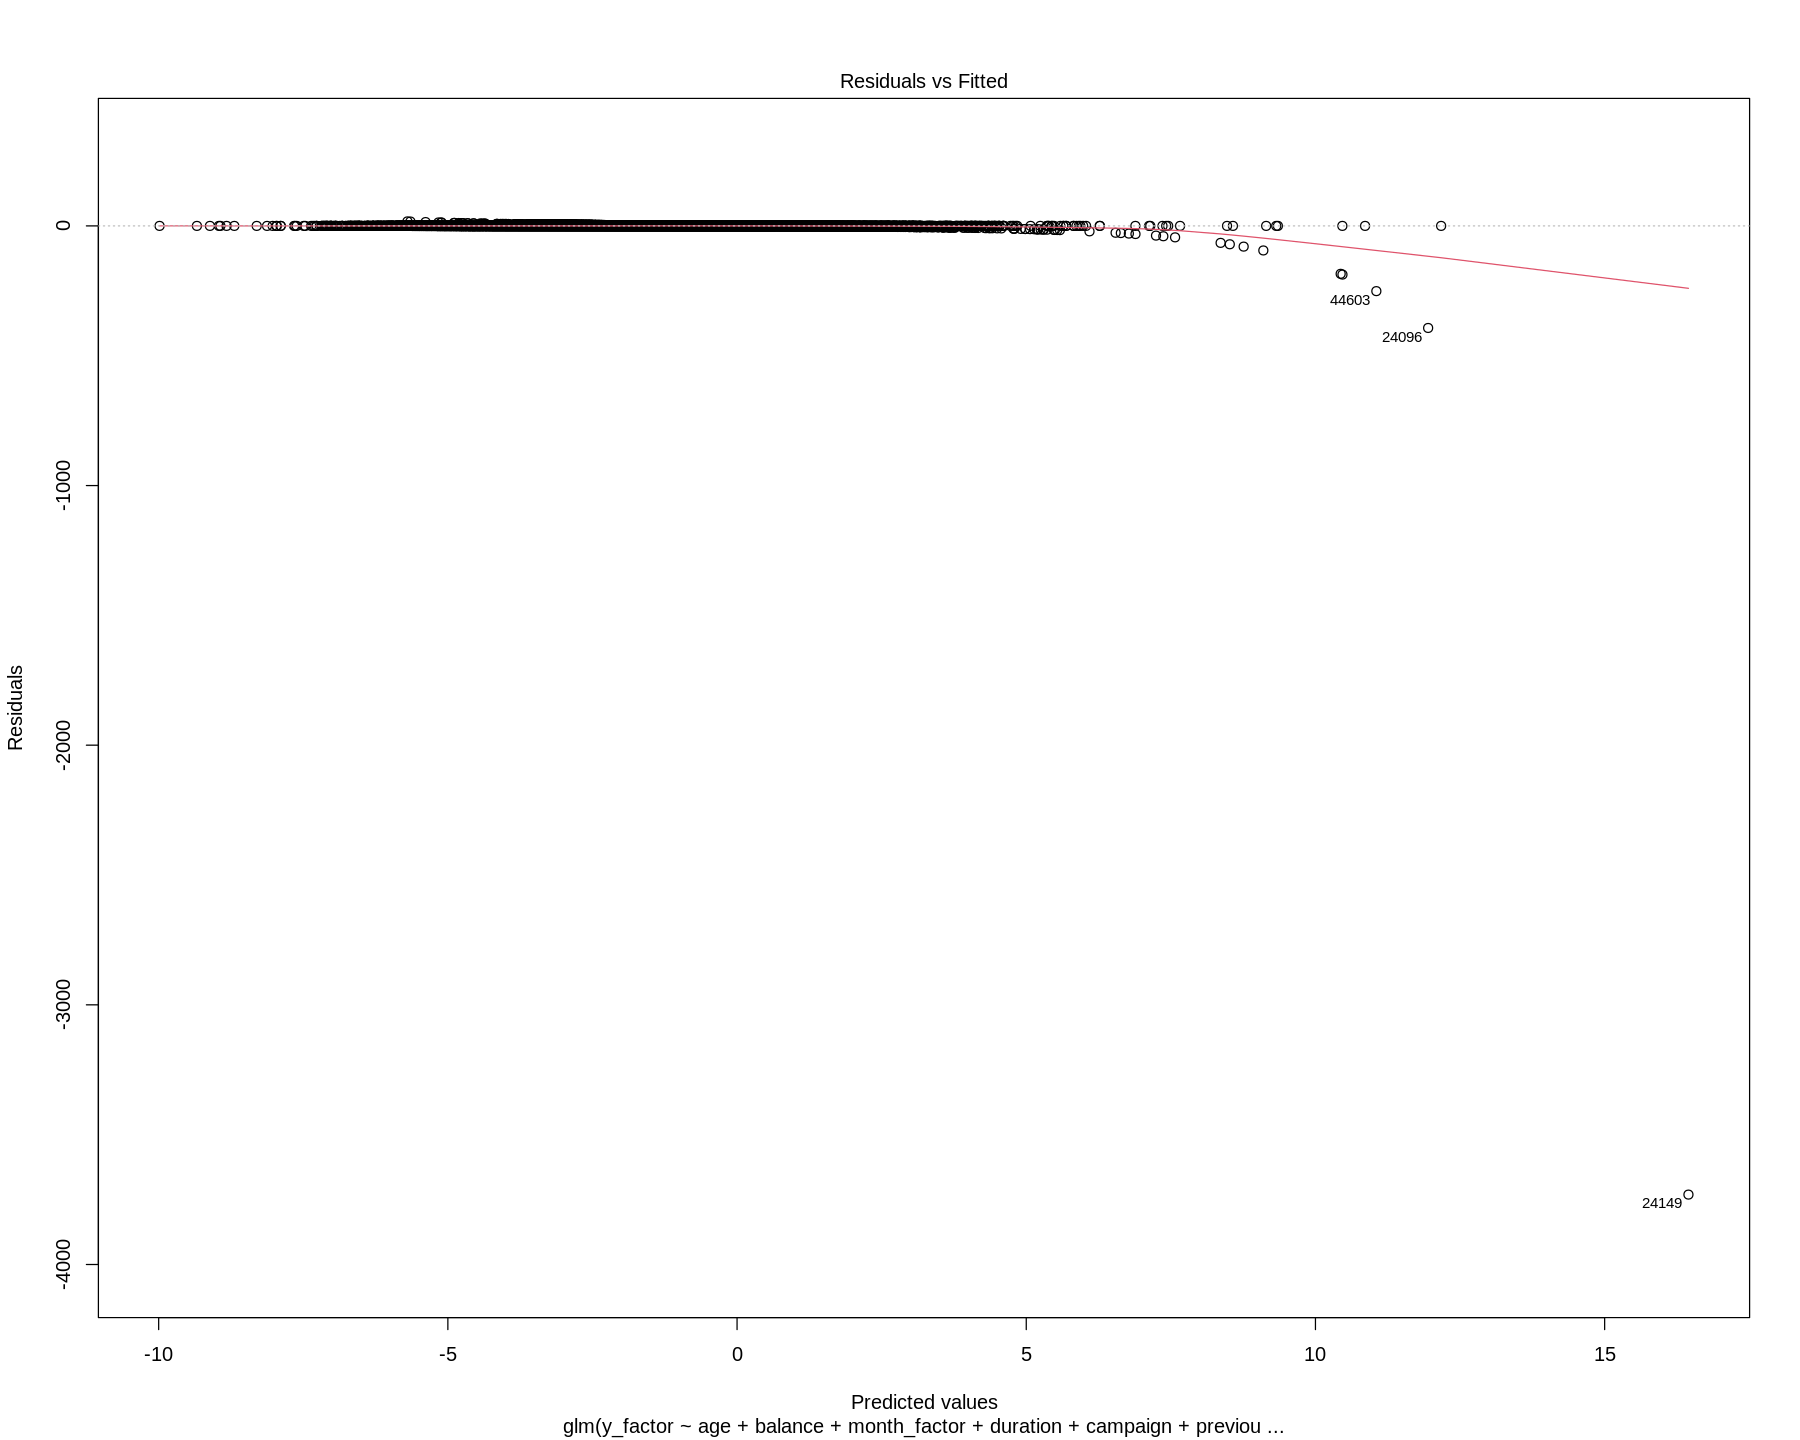

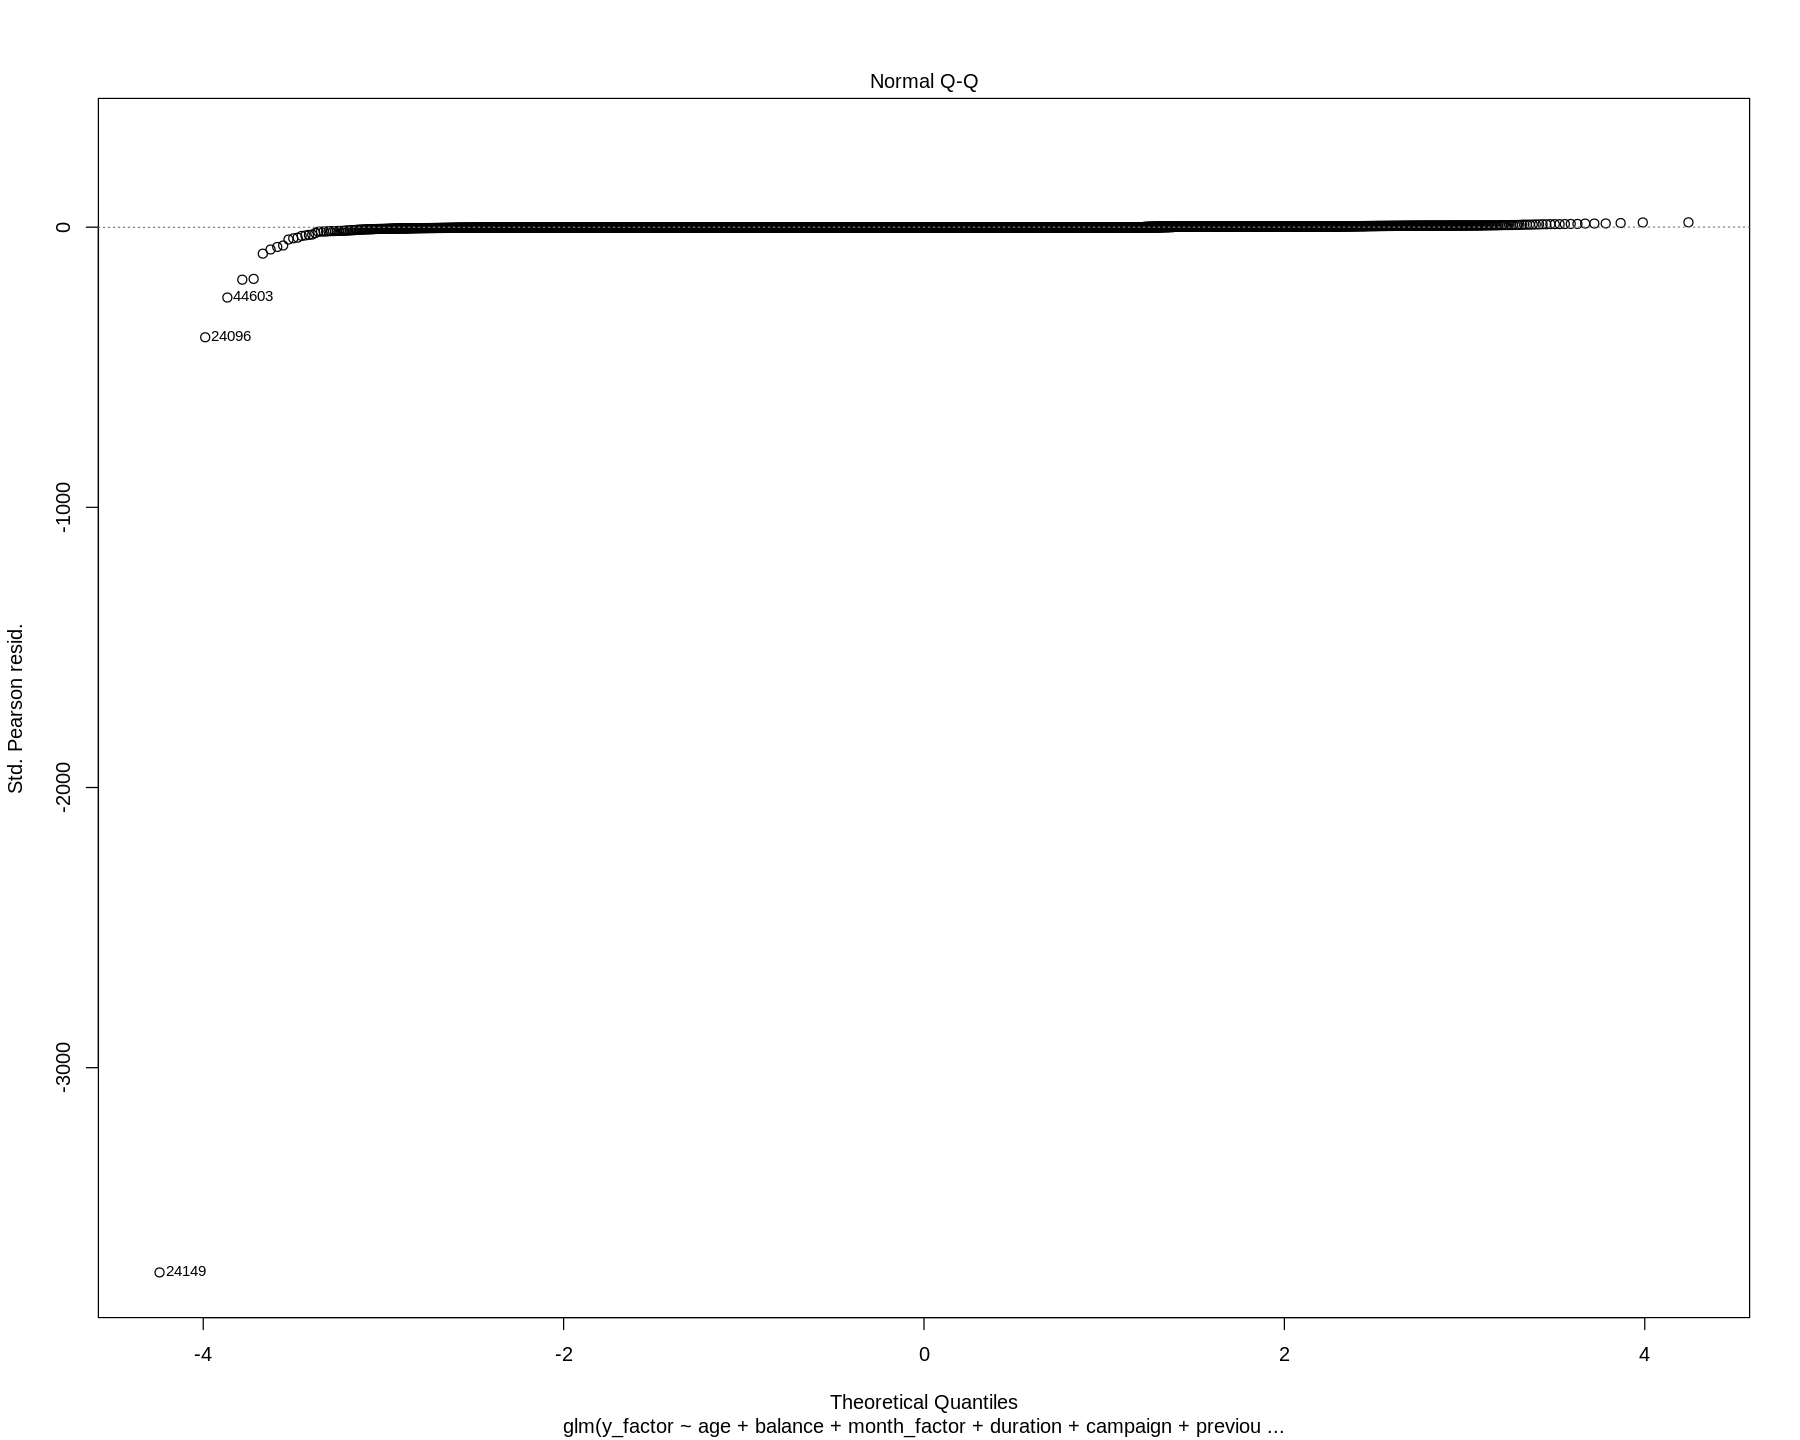

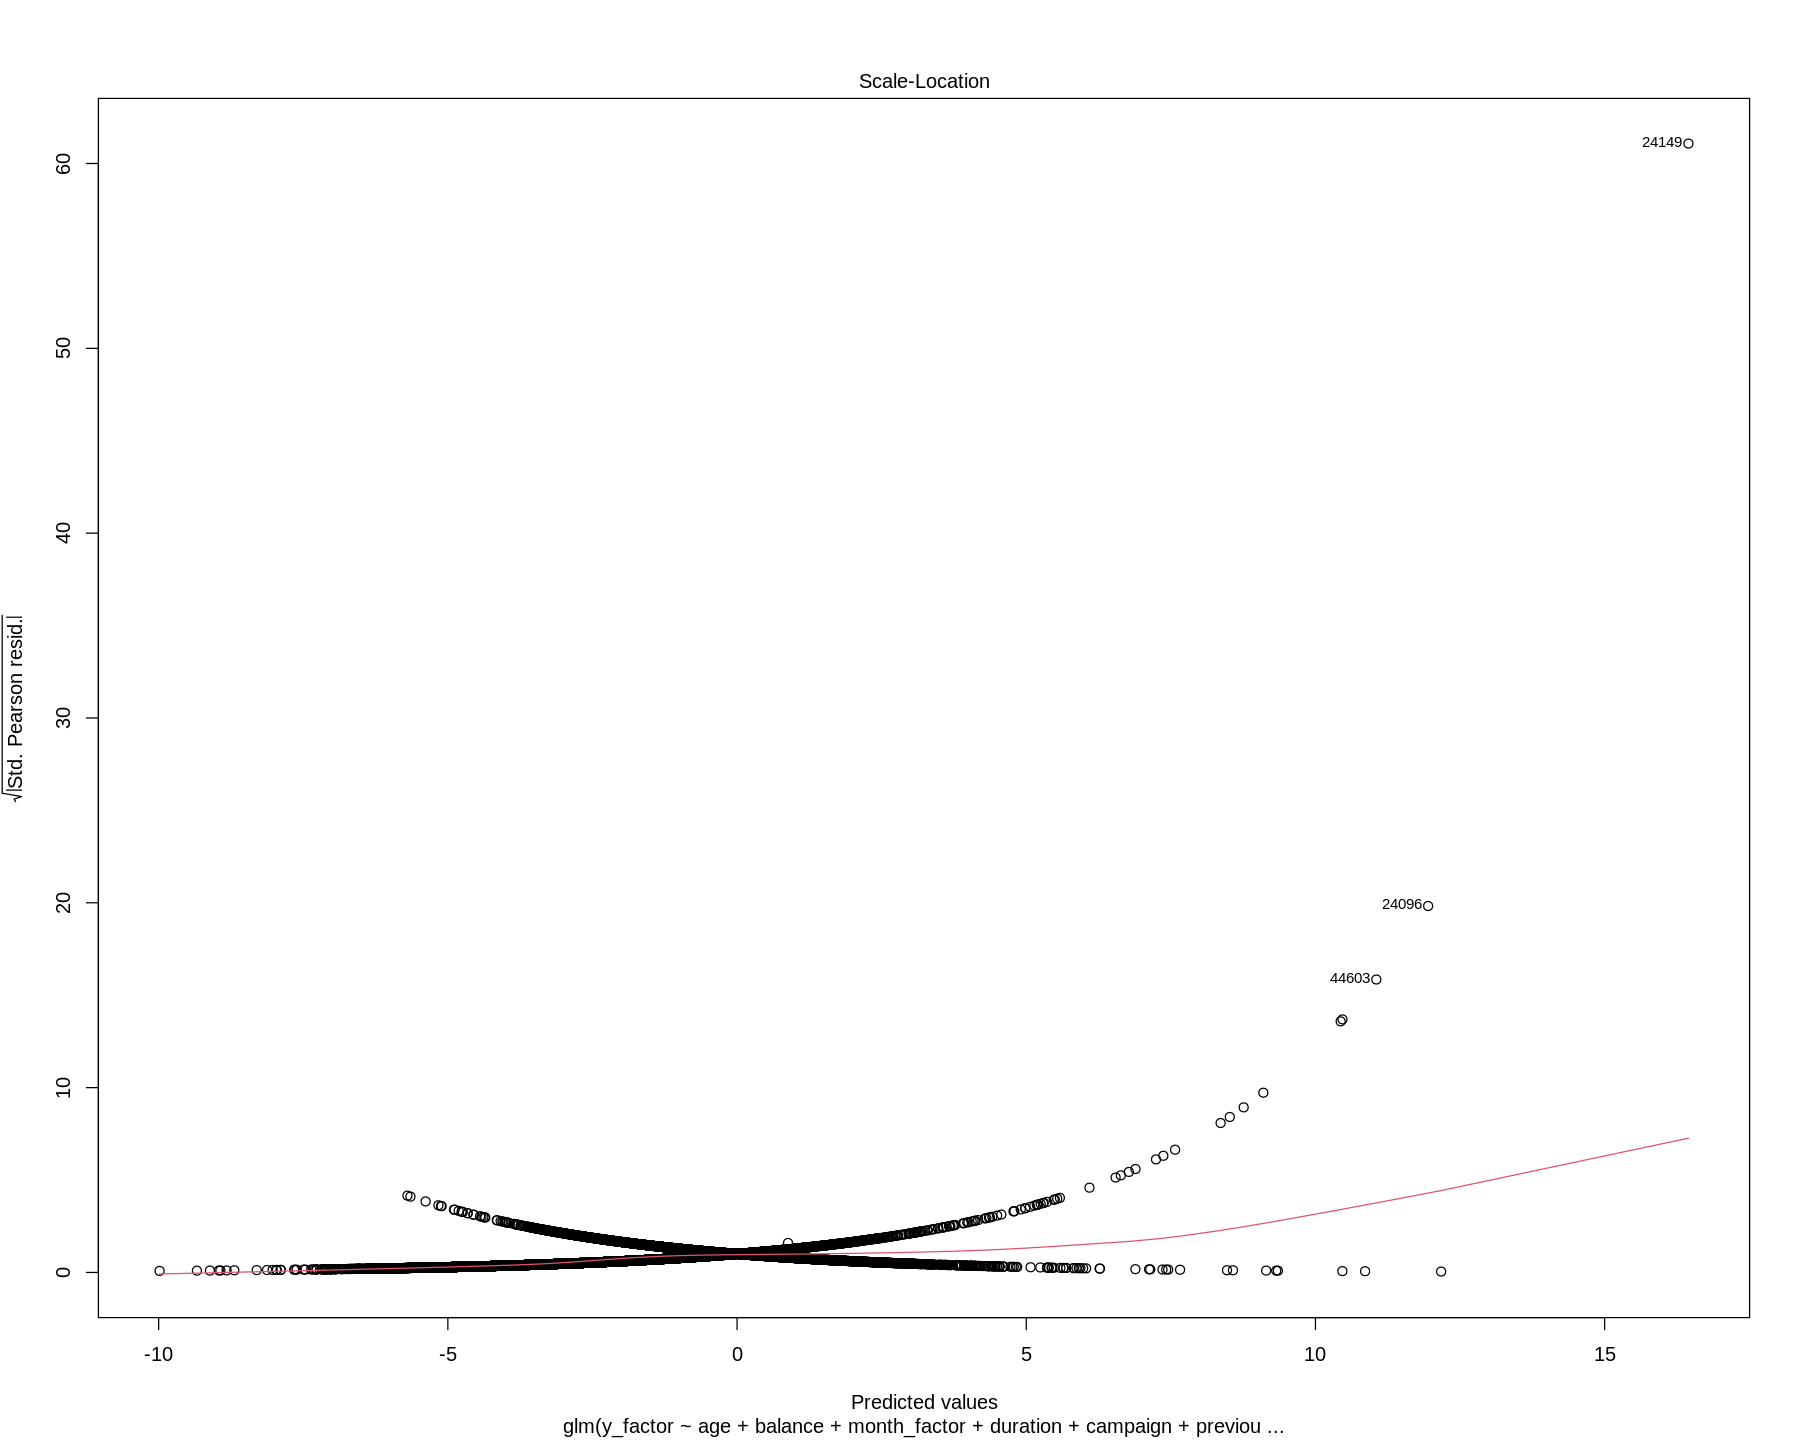

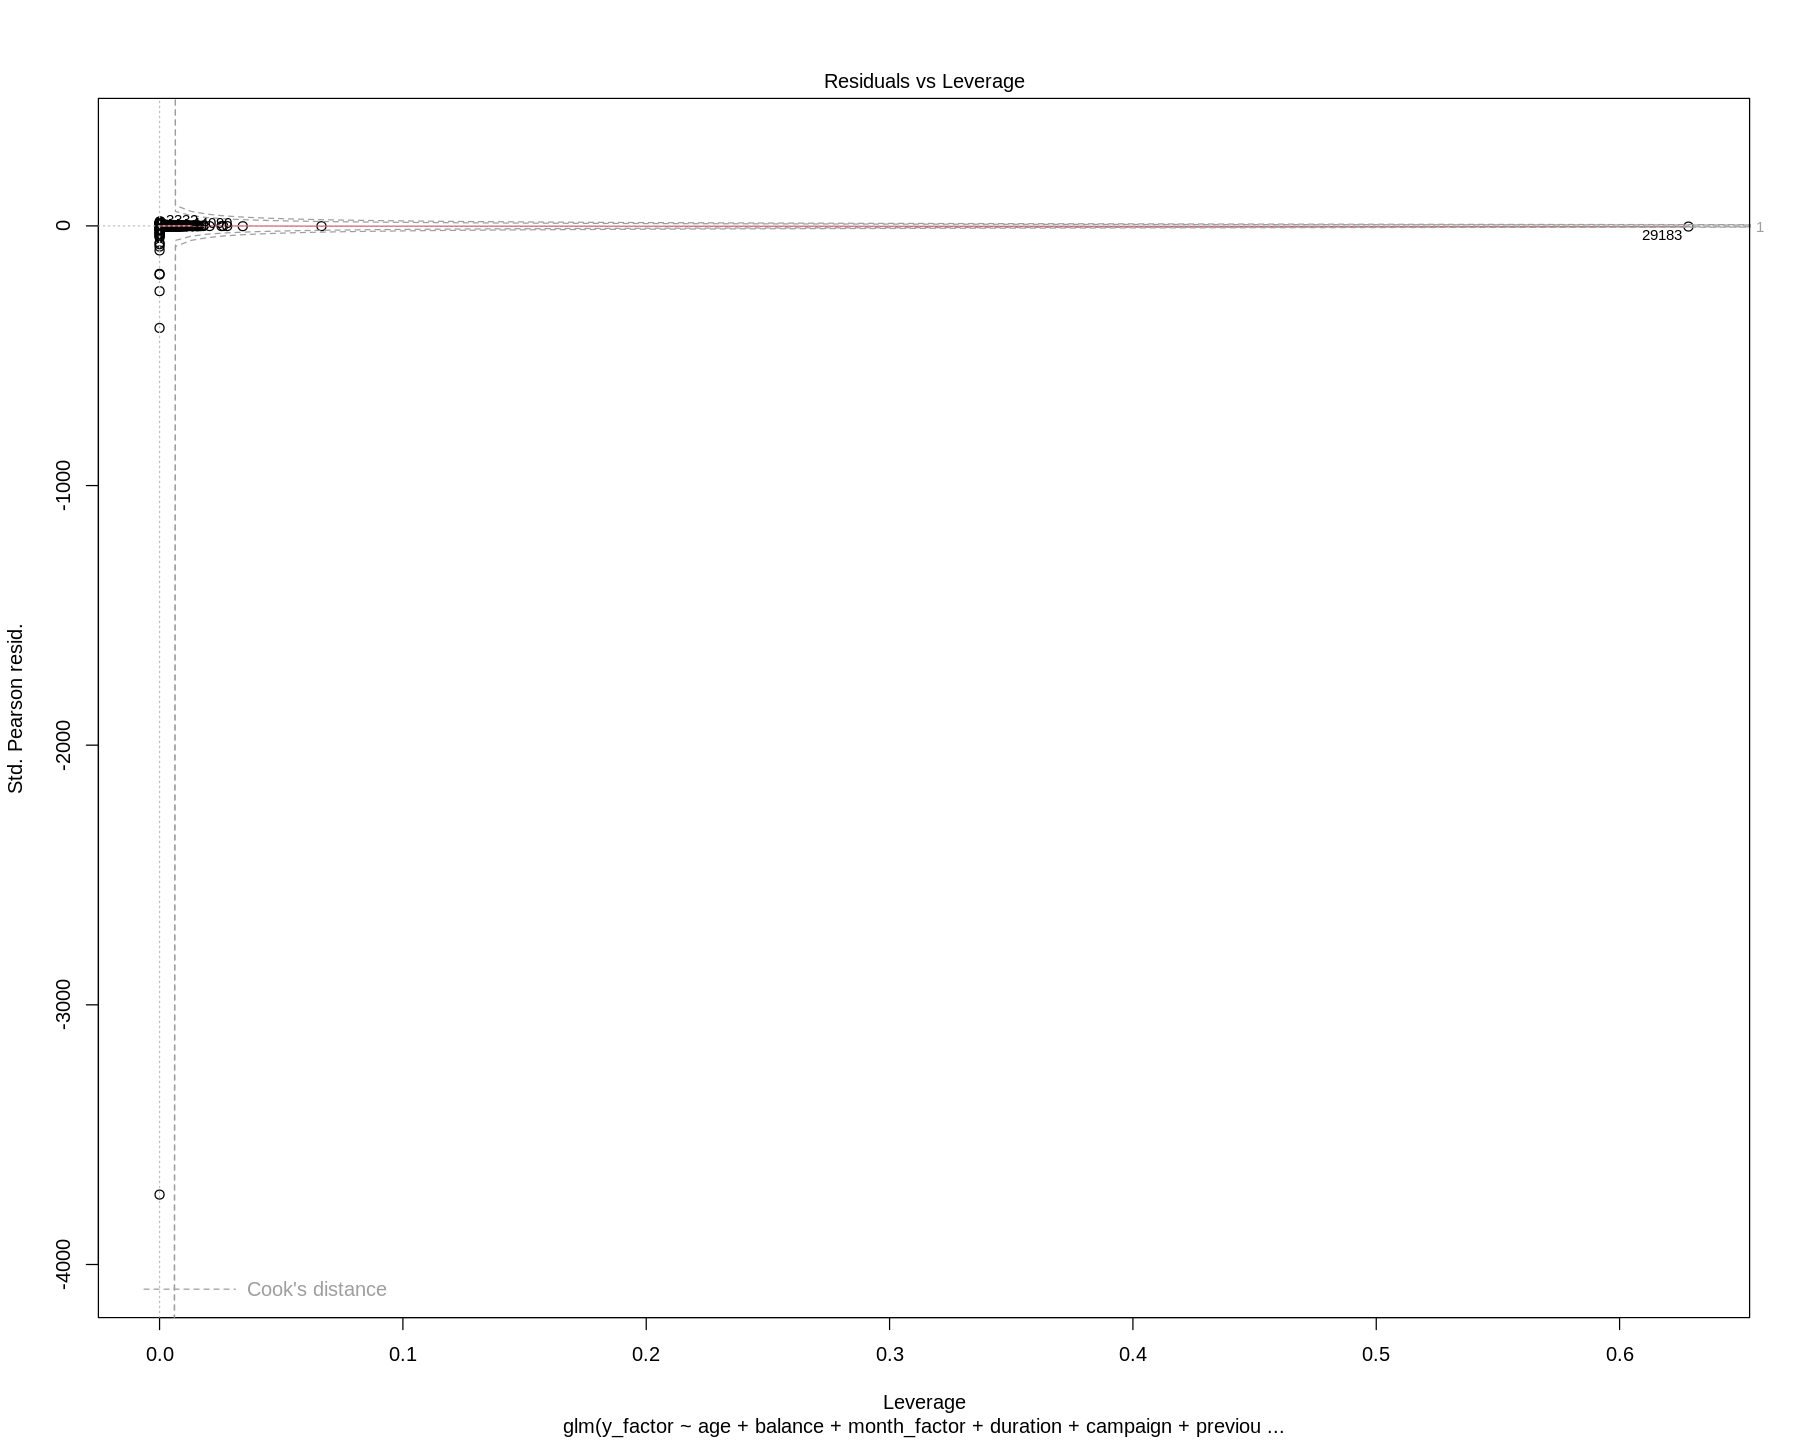

In [142]:
plot(glm.all)
# Save down the Cook's distance diagram that shows outliers are not significant, 
# although one comes close

In [157]:
car library will not install
glmtoolbox will not install


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘pbkrtest’, ‘lme4’


Warning message in install.packages("car"):
“installation of package ‘RcppEigen’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”


In [159]:
install.packages('RcppEigen')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('pbkrtest’)

In [ ]:
install.packages('lme4'r)

In [153]:
alibrary(car)

ERROR: ignored

In [156]:
devtools::install_github (“DeveloperName/PackageName”)

In [165]:
devtools::install_github('cran/car')

cli      (3.4.1  -> 3.5.0 ) [CRAN]
vctrs    (0.5.0  -> 0.5.1 ) [CRAN]
pkgload  (1.3.1  -> 1.3.2 ) [CRAN]
jsonlite (1.8.3  -> 1.8.4 ) [CRAN]
evaluate (0.18   -> 0.19  ) [CRAN]
digest   (0.6.30 -> 0.6.31) [CRAN]
testthat (3.1.5  -> 3.1.6 ) [CRAN]
xfun     (0.34   -> 0.36  ) [CRAN]
stringr  (1.4.1  -> 1.5.0 ) [CRAN]
highr    (0.9    -> 0.10  ) [CRAN]
purrr    (0.3.5  -> 1.0.0 ) [CRAN]
knitr    (1.40   -> 1.41  ) [CRAN]
broom    (1.0.1  -> 1.0.2 ) [CRAN]
lme4     (NA     -> 1.1-31) [CRAN]
pbkrtest (NA     -> 0.5.1 ) [CRAN]


Installing 15 packages: cli, vctrs, pkgload, jsonlite, evaluate, digest, testthat, xfun, stringr, highr, purrr, knitr, broom, lme4, pbkrtest

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpuiQ7g7/remotes23e3b693b0a/cran-car-74fdaae/DESCRIPTION’ ... OK
* preparing ‘car’:
* checking DESCRIPTION meta-information ... OK
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘car_3.1-1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [167]:
library('car')

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [169]:
vif(glm.all)
# All VIF are under the critical value of 10, so no variance heterogeneity problem in the data

,GVIF,Df,GVIF^(1/(2*Df))
age,2.181062,1,1.476842
balance,1.042316,1,1.020939
month_factor,2.778305,11,1.047543
duration,1.123955,1,1.060167
campaign,1.082122,1,1.040251
previous,1.272448,1,1.128028
job_factor,4.153994,11,1.066871
marital_factor,1.444198,2,1.096243
education_factor,2.256349,3,1.145252
default_factor,1.016560,1,1.008246


## Pseudo R2 measures

Installation of R library from github takes about 5 minutes usually 

In [170]:
devtools::install_github('cran/DescTools')

proxy      (NA     -> 0.4-27  ) [CRAN]
openssl    (2.0.4  -> 2.0.5   ) [CRAN]
lmom       (NA     -> 2.9     ) [CRAN]
e1071      (NA     -> 1.7-12  ) [CRAN]
rootSolve  (NA     -> 1.8.2.3 ) [CRAN]
BH         (NA     -> 1.78.0-0) [CRAN]
data.table (1.14.4 -> 1.14.6  ) [CRAN]
gld        (NA     -> 2.6.6   ) [CRAN]
Exact      (NA     -> 3.2     ) [CRAN]
expm       (NA     -> 0.999-6 ) [CRAN]
mvtnorm    (NA     -> 1.1-3   ) [CRAN]


Installing 11 packages: proxy, openssl, lmom, e1071, rootSolve, BH, data.table, gld, Exact, expm, mvtnorm

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpuiQ7g7/remotes23e6c93386c/cran-DescTools-01af189/DESCRIPTION’ ... OK
* preparing ‘DescTools’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘DescTools_0.99.47.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [171]:
library('DescTools')


Attaching package: ‘DescTools’


The following object is masked from ‘package:car’:

    Recode




In [187]:
for (i in 1:length(PseudoR2(glm.all,which='all')))
{
  print(PseudoR2(glm.all,which='all')[i])
  }

 McFadden 
0.3387154 
McFaddenAdj 
  0.3362024 
 CoxSnell 
0.2168783 
Nagelkerke 
 0.4218619 
AldrichNelson 
    0.1964433 
VeallZimmermann 
      0.4686203 
    Efron 
0.3135771 
McKelveyZavoina 
      0.4564793 
    Tjur 
0.327268 
     AIC 
21660.35 
     BIC 
22017.83 
   logLik 
-10789.17 
  logLik0 
-16315.48 
      G2 
11052.61 


In [172]:
devtools::install_github('cran/glmtoolbox')

RcppGSL      (NA -> 0.3.12    ) [CRAN]
RcppArmad... (NA -> 0.11.4.2.1) [CRAN]
RcppZiggurat (NA -> 0.1.6     ) [CRAN]
Formula      (NA -> 1.2-4     ) [CRAN]
Rfast        (NA -> 2.0.6     ) [CRAN]


Installing 5 packages: RcppGSL, RcppArmadillo, RcppZiggurat, Formula, Rfast

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘RcppGSL’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘RcppZiggurat’ had non-zero exit status”
Warning message in i.p(...):
“installation of package ‘Rfast’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpuiQ7g7/remotes23e3c8d50c3/cran-glmtoolbox-aa9bbf4/DESCRIPTION’ ... OK
* preparing ‘glmtoolbox’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘glmtoolbox_0.1.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpuiQ7g7/file23e13c1c883/glmtoolbox_0.1.4.tar.gz’ had non-zero exit status”


In [191]:
# Test the fitted model with pdays added back
colnames(bank_clean)
#re-run including pdays in the regression

#add back p_days into the data
bank_clean<-cbind(bank_clean,pdays)
colnames(bank_clean)

[1] "age"              "balance"          "duration"         "campaign"        
 [5] "previous"         "job_factor"       "marital_factor"   "education_factor"
 [9] "default_factor"   "housing_factor"   "loan_factor"      "month_factor"    
[13] "contact_factor"   "poutcome_factor"  "y_factor"         "pdays"

[1] "age"              "balance"          "duration"         "campaign"        
 [5] "previous"         "job_factor"       "marital_factor"   "education_factor"
 [9] "default_factor"   "housing_factor"   "loan_factor"      "month_factor"    
[13] "contact_factor"   "poutcome_factor"  "y_factor"         "pdays"           
[17] "pdays"

## Add back pdays

In [193]:
glm.all2<-glm(y_factor ~ age + balance + month_factor + duration + campaign 
              + previous + job_factor + marital_factor + education_factor + default_factor 
              + housing_factor + loan_factor + contact_factor + poutcome_factor
              +pdays, 
              data=bank_clean,
              family = binomial)
summary(glm.all2)


Call:
glm(formula = y_factor ~ age + balance + month_factor + duration + 
    campaign + previous + job_factor + marital_factor + education_factor + 
    default_factor + housing_factor + loan_factor + contact_factor + 
    poutcome_factor + pdays, family = binomial, data = bank_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4465  -0.4861  -0.3066  -0.1715   2.7246  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -3.523e+00  3.309e-01 -10.646  < 2e-16 ***
age                        2.248e-03  4.105e-03   0.548 0.583955    
balance                    1.294e-05  1.017e-05   1.272 0.203199    
month_factorfeb            6.711e-01  1.910e-01   3.513 0.000443 ***
month_factormar            1.828e+00  2.410e-01   7.586 3.30e-14 ***
month_factorapr            4.413e-01  1.910e-01   2.310 0.020864 *  
month_factormay            2.941e-01  1.814e-01   1.621 0.104961    
month_factorjun            1.50

# Model Selection 

In [196]:
# Define models with (1) no variables, and (2) all variables

null_model<-glm(y_factor~1,data=independent_variables,family=binomial)
full_model<-glm(y_factor~. , data=independent_variables,family=binomial)

In [197]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [198]:
glm_step_AIC <- stepAIC(full_model,trace = TRUE, direction= "both")

summary(glm_step_AIC)

Start:  AIC=21660.35
y_factor ~ age + balance + duration + campaign + previous + job_factor + 
    marital_factor + education_factor + default_factor + housing_factor + 
    loan_factor + month_factor + contact_factor + poutcome_factor

                   Df Deviance   AIC
- age               1    21578 21658
- default_factor    1    21578 21658
<none>                   21578 21660
- previous          1    21581 21661
- balance           1    21584 21664
- education_factor  3    21606 21682
- marital_factor    2    21617 21695
- loan_factor       1    21633 21713
- job_factor       11    21677 21737
- campaign          1    21663 21743
- housing_factor    1    21832 21912
- contact_factor    2    22105 22183
- month_factor     11    22605 22665
- poutcome_factor   3    22800 22876
- duration          1    27155 27235

Step:  AIC=21658.35
y_factor ~ balance + duration + campaign + previous + job_factor + 
    marital_factor + education_factor + default_factor + housing_factor + 
    loa


Call:
glm(formula = y_factor ~ balance + duration + campaign + previous + 
    job_factor + marital_factor + education_factor + housing_factor + 
    loan_factor + month_factor + contact_factor + poutcome_factor, 
    family = binomial, data = independent_variables)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7354  -0.3753  -0.2531  -0.1501   3.3774  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -3.555e+00  1.522e-01 -23.355  < 2e-16 ***
balance                    1.295e-05  5.116e-06   2.531 0.011386 *  
duration                   4.186e-03  6.450e-05  64.892  < 2e-16 ***
campaign                  -8.520e-02  1.001e-02  -8.511  < 2e-16 ***
previous                   9.695e-03  6.424e-03   1.509 0.131265    
job_factorblue-collar     -3.140e-01  7.256e-02  -4.328 1.51e-05 ***
job_factorentrepreneur    -3.629e-01  1.254e-01  -2.895 0.003793 ** 
job_factorhousemaid       -4.989e-01  1.359e-01  -3

 The automated model drops age and default factor as variables

In [201]:
# with another method
step_model <- step(null_model, 
                   scope = list(lower = null_model,
                                upper = full_model),
                   direction = "both")

summary(step_model)

Start:  AIC=32632.95
y_factor ~ 1

                   Df Deviance   AIC
+ duration          1    27502 27506
+ poutcome_factor   3    29973 29981
+ month_factor     11    30429 30453
+ contact_factor    2    31399 31405
+ housing_factor    1    31758 31762
+ job_factor       11    31884 31908
+ previous          1    32276 32280
+ campaign          1    32281 32285
+ loan_factor       1    32393 32397
+ education_factor  3    32396 32404
+ marital_factor    2    32441 32447
+ balance           1    32532 32536
+ age               1    32603 32607
+ default_factor    1    32604 32608
<none>                   32631 32633

Step:  AIC=27505.66
y_factor ~ duration



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                   Df Deviance   AIC
+ poutcome_factor   3    24695 24705
+ month_factor     11    25002 25028
+ contact_factor    2    26093 26101
+ housing_factor    1    26401 26407
+ job_factor       11    26627 26653
+ previous          1    27069 27075
+ campaign          1    27213 27219
+ education_factor  3    27231 27241
+ loan_factor       1    27248 27254
+ marital_factor    2    27329 27337
+ balance           1    27417 27423
+ age               1    27467 27473
+ default_factor    1    27480 27486
<none>                   27502 27506
- duration          1    32631 32633

Step:  AIC=24705.21
y_factor ~ duration + poutcome_factor

                   Df Deviance   AIC
+ month_factor     11    23046 23078
+ housing_factor    1    23800 23812
+ contact_factor    2    23885 23899
+ job_factor       11    24101 24133
+ education_factor  3    24516 24532
+ loan_factor       1    24536 24548
+ marital_factor    2    24551 24565
+ campaign          1    24553 24565
+ balance      


Call:
glm(formula = y_factor ~ duration + poutcome_factor + month_factor + 
    contact_factor + housing_factor + job_factor + campaign + 
    loan_factor + marital_factor + education_factor + balance + 
    previous, family = binomial, data = independent_variables)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7354  -0.3753  -0.2531  -0.1501   3.3774  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -3.555e+00  1.522e-01 -23.355  < 2e-16 ***
duration                   4.186e-03  6.450e-05  64.892  < 2e-16 ***
poutcome_factorother       2.114e-01  8.958e-02   2.360 0.018295 *  
poutcome_factorsuccess     2.299e+00  7.968e-02  28.860  < 2e-16 ***
poutcome_factorunknown    -6.163e-02  6.039e-02  -1.021 0.307473    
month_factorfeb            9.132e-01  1.221e-01   7.477 7.61e-14 ***
month_factormar            2.720e+00  1.484e-01  18.323  < 2e-16 ***
month_factorapr            1.174e+00  1.198e-01   9

# Classification

How do our models perform in classifying the 'yes' or 'no' customers    
based on the glm.all model?    
This follows Hastie et al. (2021), section 4.3 and 4.7.2.     

In [205]:
print(summary(y_factor))

   no   yes 
39922  5289 


Percentage 'yes' is 5289/(39922+5289)=  0.1169848 approx = 11.7%    
Similar to the original study by Moro et al. (2014)

Classes are significantly imbalanced, with many more 'no' consumers than 'yes'
Naive classifier constantly predicting 'no' will be correct about 88.3% of the time

 Here, first we calculate using the 50% threshold, then with the true population mean of 11.7%

In [207]:

contrasts(y_factor)

glm.probs<-predict(step_model,type='response')
# Extract probabilities estimated as the dependent variable in the logistic regression

,yes
no,0
yes,1


In [208]:
glm.probs[1:10]
# Display some probabilities for inspection

1           2           3           4           5           6 
0.016454851 0.010843102 0.003264403 0.006156891 0.023823827 0.009699369 
          7           8           9          10 
0.011474354 0.025602611 0.006973027 0.007334215

In [210]:
length(glm.probs)         
# Check that there are the correct number of probs, one for each observation input

[1] 45211

In [211]:
glm.pred<-rep("no",length(glm.probs))
# Create the matrix for predictions, populated with 'no' glm.pred

In [216]:
# To begin with, make the simple assumption of a 50% threshold value,
# so an observation with prob, the y output, > 50% is assumed to be 
# a 'yes' customer prediction
# The class imbalance falsifies this, so let's look at the consequences

glm.pred[glm.probs > 0.5]= 'yes'
glm.pred<-factor(glm.pred)

In [217]:

print(summary(glm.pred))
# with the 50% threshold, our model predictions are

# Our observations show
# no      yes 
# 39,922  5,289 
# So, this model classification underestimates the 'yes' customers


   no   yes 
42391  2820 


In [218]:
table(glm.pred, y_factor)

        y_factor
glm.pred    no   yes
     no  38938  3453
     yes   984  1836

TPR = TP / (TP + FN ) = sensitivity

In [219]:
1836/(1836+3453)
# =34.71% sensiivity, very bad

[1] 0.3471356

TNR = TN / (TN + FP) = specificity

In [223]:
38938 / (38938 + 984) 
# = 97.535%
# = very accurate for the 'no' customers

[1] 0.9753519

In [227]:
# Classification using the population threshold
# Redo the classification, altering the threshold to match the population % of 'yes' customers
# as described in Branco et al. (2017)
glm.pred<-rep("no",length(glm.probs))
# Create the matrix for predictions, populated with 'no' glm.pred
glm.pred[glm.probs > 0.117]= 'yes'
glm.pred<-factor(glm.pred)

In [231]:
print(summary(glm.pred))
# Our observations show
# no      yes 
# 39,922  5,289 
# So, this model classification overestimates the 'yes' customers


   no   yes 
34501 10710 


In [232]:
# Print out the statistics for the confusion matrix
table(glm.pred, y_factor)

        y_factor
glm.pred    no   yes
     no  33596   905
     yes  6326  4384

In [233]:
# threshold = 0.117, matching the proportion of 'yes' in the dataset

In [234]:
# Sensitivity = TPR = TP / (TP + FN ) = 
4384/(4384+905)


[1] 0.8288901

In [235]:
# Specificity = TNR = TN / (TN + FP) = 
33596 / (33596 + 6325)
# = 84.16%


[1] 0.8415621

# Caret installation
for cross-validation and the ROC curve 


In [239]:
devtools::install_github('cran/caret') # takes nearly 10 mins

future.apply (NA    -> 1.10.0    ) [CRAN]
lava         (NA    -> 1.7.0     ) [CRAN]
prodlim      (NA    -> 2019.11.13) [CRAN]
plyr         (NA    -> 1.8.8     ) [CRAN]
timeDate     (NA    -> 4021.107  ) [CRAN]
ipred        (NA    -> 0.9-13    ) [CRAN]
hardhat      (NA    -> 1.2.0     ) [CRAN]
gower        (NA    -> 1.0.1     ) [CRAN]
clock        (NA    -> 0.6.1     ) [CRAN]
isoband      (0.2.6 -> 0.2.7     ) [CRAN]
reshape2     (NA    -> 1.4.4     ) [CRAN]
recipes      (NA    -> 1.0.3     ) [CRAN]
pROC         (NA    -> 1.18.0    ) [CRAN]
ModelMetrics (NA    -> 1.2.2.2   ) [CRAN]


Installing 14 packages: future.apply, lava, prodlim, plyr, timeDate, ipred, hardhat, gower, clock, isoband, reshape2, recipes, pROC, ModelMetrics

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpuiQ7g7/remotes23e49707d7/cran-caret-32568cf/DESCRIPTION’ ... OK
* preparing ‘caret’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘caret_6.0-93.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Cross Validation

In [241]:
library(caret)
# https://cran.r-project.org/web/packages/caret/caret.pdf
# https://topepo.github.io/caret/index.html
# Code example adapted from https://daviddalpiaz.github.io/r4sl/the-caret-package.html
# James et al. (2021), section 4.7.2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE




In [242]:
#set a seed so that results can be re-run 
set.seed(1)

In [243]:
#specify the cross-validation method
ctrl <- trainControl(method = "cv", number = 5)

In [244]:
#fit a logistic regression model and use k-fold CV to evaluate performance
cv.full <- train(y_factor~ age + balance + month_factor + duration + campaign 
                 + previous + job_factor + marital_factor + education_factor + default_factor 
                 + housing_factor + loan_factor + contact_factor + poutcome_factor,
                 data=bank_clean,
                 method='glm',
                 family='binomial',
                 trControl = ctrl)

In [245]:
print(cv.full)  

Generalized Linear Model 

45211 samples
   14 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 36169, 36169, 36170, 36168, 36168 
Resampling results:

  Accuracy  Kappa    
  0.901639  0.4031705



In [246]:
summary(cv.full)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7356  -0.3753  -0.2531  -0.1501   3.3771  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -3.560e+00  1.850e-01 -19.246  < 2e-16 ***
age                        1.104e-04  2.203e-03   0.050 0.960033    
balance                    1.291e-05  5.136e-06   2.513 0.011965 *  
month_factorfeb            9.131e-01  1.221e-01   7.475 7.70e-14 ***
month_factormar            2.719e+00  1.485e-01  18.319  < 2e-16 ***
month_factorapr            1.174e+00  1.198e-01   9.802  < 2e-16 ***
month_factormay            7.307e-01  1.165e-01   6.273 3.54e-10 ***
month_factorjun            1.532e+00  1.262e-01  12.142  < 2e-16 ***
month_factorjul            3.400e-01  1.178e-01   2.886 0.003896 ** 
month_factoraug            4.394e-01  1.170e-01   3.757 0.000172 ***
month_factorsep            1.982e+00  1.472e-01  13.459  < 2e-16 ***
month_factoroct            2.05

The coefficients match the *glm.all* model estimated above

Redo the fit and k-fold CV with the reduced model from the step-wise analysis that drops    
age and default_factor

In [249]:
cv.step <- train(y_factor~ balance + month_factor + duration + campaign 
                 + previous + job_factor + marital_factor + education_factor
                 + housing_factor + loan_factor + contact_factor + poutcome_factor,
                 data=bank_clean,
                 method='glm',
                 family='binomial',
                 trControl = ctrl)

In [250]:
print(cv.step)

Generalized Linear Model 

45211 samples
   12 predictor
    2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 36168, 36169, 36170, 36168, 36169 
Resampling results:

  Accuracy   Kappa    
  0.9014843  0.4018301



In [251]:
summary(cv.step)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.7354  -0.3753  -0.2531  -0.1501   3.3774  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -3.555e+00  1.522e-01 -23.355  < 2e-16 ***
balance                    1.295e-05  5.116e-06   2.531 0.011386 *  
month_factorfeb            9.132e-01  1.221e-01   7.477 7.61e-14 ***
month_factormar            2.720e+00  1.484e-01  18.323  < 2e-16 ***
month_factorapr            1.174e+00  1.198e-01   9.804  < 2e-16 ***
month_factormay            7.307e-01  1.165e-01   6.273 3.53e-10 ***
month_factorjun            1.533e+00  1.262e-01  12.143  < 2e-16 ***
month_factorjul            3.399e-01  1.178e-01   2.885 0.003909 ** 
month_factoraug            4.396e-01  1.169e-01   3.759 0.000170 ***
month_factorsep            1.982e+00  1.472e-01  13.461  < 2e-16 ***
month_factoroct            2.054e+00  1.393e-01  14.748  < 2e-16 ***
month_factornov            3.03

 Coefficients show only minor differences to glm.all 